In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
import datetime
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactorResults
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler

In [2]:
def adf_test(series):
    """
    Performs the ADF test and prints the results.
    """
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value:.4f}")

In [3]:
def mape(y_true, y_pred):
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true)))

In [4]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(np.array(y_pred) - np.array(y_true)) / (np.abs(np.array(y_true)) 
                                                                      + np.abs(np.array(y_pred))))

In [5]:
def mda(y_true, y_pred):
    
    dreal = np.array(y_true[1:])-np.array(y_true[:-1])
    dpred = np.array(y_pred[1:])-np.array(y_pred[:-1])
    sign_matches = np.sign(dreal) == np.sign(dpred)
    num_matches = np.sum(sign_matches)
    return num_matches/len(dreal)

In [6]:
def mda_M(y_true, y_pred):
    dreal = np.array(y_true[3:])-np.array(y_true[:-3])
    dpred = np.array(y_pred[3:])-np.array(y_pred[:-3])
    sign_matches = np.sign(dreal) == np.sign(dpred)
    num_matches = np.sum(sign_matches)
    return num_matches/len(dreal)

In [7]:
def rmsfe(y_true, y_pred):
    answer = []
    for i in range(1,len(y_true)):
        ytrue = y_true[:i]
        ypred = y_pred[:i]
        rmse = np.sqrt(mean_squared_error(np.array(ytrue), np.array(ypred)))
        answer.append(rmse)
    return answer

In [133]:
def corr_direction(y_true, y_pred):
    dreal = np.array(y_true[1:]) - np.array(y_true[:-1])
    dpred = np.array(y_pred[1:]) - np.array(y_pred[:-1])
    return np.corrcoef(dreal, dpred)[0, 1]  # Corrélation entre dreal et dpred


In [134]:
def ofsperformance(y_true, y_pred):
    print("mean absolute error:", mean_absolute_error(np.array(y_true),
                                                         np.array(y_pred)))
    
    print("mean absolute percentage error:", mape(y_true, y_pred))
    
    print("root mean square error:", np.sqrt(mean_squared_error(np.array(y_true),
                                                                   np.array(y_pred))))
    
    print("real time root-mean-squared-forecast-error:", rmsfe(y_true,y_pred))
    
    print("mean directional accuracy:", mda(y_true, y_pred))
    print("corr direction des previsions:", corr_direction(y_true, y_pred))
    
    print("whole mean directional accuracy:", mda_M(y_true, y_pred))

In [32]:
import os
import pandas as pd

# Spécifier le chemin vers le dossier contenant les fichiers Excel
folder_path = 'donn'

# Parcourir tous les fichiers Excel dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx') or filename.endswith('.xlsm'):
        # Extraire le nom du fichier sans extension
        df_name = os.path.splitext(filename)[0]
        
        # Charger le fichier Excel dans un DataFrame
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        
        # Remplacer les virgules par des points dans tout le DataFrame
        df = df.replace(',', '.', regex=True)
        

        # Assigner le DataFrame à une variable dont le nom est celui du fichier
        globals()[df_name] = df
        
        # Afficher un message confirmant le chargement et la création du DataFrame
        print(f"DataFrame '{df_name}' créé avec succès.")
        
        # Afficher le head du DataFrame
        print(f"Voici le début du DataFrame '{df_name}':")
        print(df.head())
        print("\n" + "="*50 + "\n")  # Séparateur pour une meilleure lisibilité


DataFrame 'CreancesSurEconomie' créé avec succès.
Voici le début du DataFrame 'CreancesSurEconomie':
   Créances des ID   Créances des AID  Créances  de BAM
0     829370.095019     828477.359675        892.735344
1     833630.182802     832741.923113        888.259689
2     846607.788291     845620.695376        987.092915
3     843104.311953     842195.694455        908.617498
4     854092.519756     853278.953938        813.565818


DataFrame 'exports' créé avec succès.
Voici le début du DataFrame 'exports':
   exports
0    15705
1    16168
2    18081
3    18116
4    18263


DataFrame 'fosils_interbq_occupation' créé avec succès.
Voici le début du DataFrame 'fosils_interbq_occupation':
      Fuel   Charbon local   Charbon importé   Petcoke    Gasoil   \
0   86507.0          135978            311122     57950    1080.0   
1  165570.0           71633            656839    114649    2288.0   
2  219804.0          111739           1040541    186242    3711.0   
3  297376.0          139657

In [33]:
import pandas as pd

# 1. IPC_2017 : Janvier 2014 à Avril 2024
dates_ipc_2017 = pd.date_range(start="2017-01-31", end="2024-04-30", freq="M")
IPC_2017.index = dates_ipc_2017[:len(IPC_2017)]
print(f"Fin des données IPC_2017 : {IPC_2017.index[-1]}")

# 2. Exports et Imports : Janvier 2014 à Décembre 2023
dates_exports_imports = pd.date_range(start="2014-01-31", end="2023-12-31", freq="M")
exports.index = dates_exports_imports[:len(exports)]
imports.index = dates_exports_imports[:len(imports)]
print(f"Fin des données Exports : {exports.index[-1]}")
print(f"Fin des données Imports : {imports.index[-1]}")

# 3. IPProd : Janvier 2014 à Décembre 2020
dates_ipprod = pd.date_range(start="2014-01-31", end="2020-12-31", freq="M")
IPProd.index = dates_ipprod[:len(IPProd)]
print(f"Fin des données IPProd : {IPProd.index[-1]}")

# 4. Monnaie_agregats : Janvier 2014 à Juillet 2024
dates_monnaie_agregats = pd.date_range(start="2014-01-31", end="2024-07-31", freq="M")
Monnaie_agregats.index = dates_monnaie_agregats[:len(Monnaie_agregats)]
print(f"Fin des données Monnaie_agregats : {Monnaie_agregats.index[-1]}")

# 5. Taux de chômage : Trimestriel de 2014T1 à 2024T1
dates_tx_chomage = pd.date_range(start="2014-03-31", end="2024-03-31", freq="Q")
tx_chomage.index = dates_tx_chomage[:len(tx_chomage)]
print(f"Fin des données Taux de chômage : {tx_chomage.index[-1]}")

# 6. Fossiles interbq occupation : Janvier 2014 à Juin 2024
dates_fossils_interbq_occupation = pd.date_range(start="2014-01-31", end="2024-06-30", freq="M")
fosils_interbq_occupation.index = dates_fossils_interbq_occupation[:len(fosils_interbq_occupation)]
print(f"Fin des données Fossiles interbq occupation : {fosils_interbq_occupation.index[-1]}")

# 7. Taux d'emploi : Trimestriel de 2014T1 à 2024T1
dates_tx_emploi = pd.date_range(start="2014-03-31", end="2024-03-31", freq="Q")
tx_emploi.index = dates_tx_emploi[:len(tx_emploi)]
print(f"Fin des données Taux d'emploi : {tx_emploi.index[-1]}")

# 8. PL_agregats : Janvier 2014 à Juillet 2024
dates_pl_agregats = pd.date_range(start="2014-01-31", end="2024-07-31", freq="M")
PL_agregats.index = dates_pl_agregats[:len(PL_agregats)]
print(f"Fin des données PL_agregats : {PL_agregats.index[-1]}")



# 9. CreanceSurEconomie : Janvier 2014 à Juillet 2024
dates_creance_sur_economie = pd.date_range(start="2014-01-31", end="2024-07-31", freq="M")
CreancesSurEconomie.index = dates_creance_sur_economie[:len(CreancesSurEconomie)]
print(f"Fin des données CreancesSurEconomie : {CreancesSurEconomie.index[-1]}")


Fin des données IPC_2017 : 2024-04-30 00:00:00
Fin des données Exports : 2023-12-31 00:00:00
Fin des données Imports : 2023-12-31 00:00:00
Fin des données IPProd : 2020-12-31 00:00:00
Fin des données Monnaie_agregats : 2024-07-31 00:00:00
Fin des données Taux de chômage : 2024-03-31 00:00:00
Fin des données Fossiles interbq occupation : 2024-06-30 00:00:00
Fin des données Taux d'emploi : 2024-03-31 00:00:00
Fin des données PL_agregats : 2024-07-31 00:00:00
Fin des données CreancesSurEconomie : 2024-07-31 00:00:00


In [34]:
import pandas as pd

# 1. Moyennes annuelles pour les années 2014, 2015, 2016
ipc_values_2014 = [97.4] * 12  # 12 mois pour l'année 2014
ipc_values_2015 = [98.6] * 12  # 12 mois pour l'année 2015
ipc_values_2016 = [99.1] * 12  # 12 mois pour l'année 2016

# 2. Création des dates pour les années 2014 à 2016
dates_2014_to_2016 = pd.date_range(start="2014-01-31", end="2016-12-31", freq="M")

# 3. Création d'un DataFrame avec ces valeurs
data_2014_to_2016 = ipc_values_2014 + ipc_values_2015 + ipc_values_2016
df_2014_to_2016 = pd.DataFrame(data_2014_to_2016, index=dates_2014_to_2016, columns=['IPC'])

# 4. Vérifier que l'index actuel de IPC_2017 commence à partir de janvier 2017
# (sinon, ajuster en conséquence)
dates_ipc_2017 = pd.date_range(start="2017-01-31", end="2024-04-30", freq="M")
IPC_2017.index = dates_ipc_2017[:len(IPC_2017)]

# 5. Concatenation des deux DataFrames
IPC_2017_ex = pd.concat([df_2014_to_2016, IPC_2017])

# 6. Affichage pour vérifier
print(IPC_2017_ex.head(36))  # Les 3 premières années ajoutées (2014, 2015, 2016)
print(IPC_2017_ex.tail())  # Les dernières dates (pour vérifier la fin)


             IPC
2014-01-31  97.4
2014-02-28  97.4
2014-03-31  97.4
2014-04-30  97.4
2014-05-31  97.4
2014-06-30  97.4
2014-07-31  97.4
2014-08-31  97.4
2014-09-30  97.4
2014-10-31  97.4
2014-11-30  97.4
2014-12-31  97.4
2015-01-31  98.6
2015-02-28  98.6
2015-03-31  98.6
2015-04-30  98.6
2015-05-31  98.6
2015-06-30  98.6
2015-07-31  98.6
2015-08-31  98.6
2015-09-30  98.6
2015-10-31  98.6
2015-11-30  98.6
2015-12-31  98.6
2016-01-31  99.1
2016-02-29  99.1
2016-03-31  99.1
2016-04-30  99.1
2016-05-31  99.1
2016-06-30  99.1
2016-07-31  99.1
2016-08-31  99.1
2016-09-30  99.1
2016-10-31  99.1
2016-11-30  99.1
2016-12-31  99.1
              IPC
2023-12-31  118.2
2024-01-31  117.5
2024-02-29  117.2
2024-03-31  118.0
2024-04-30  118.7


In [35]:

tx_chomage.columns = ['Experienced_Unemployed', 'First_Time_Unemployed']
tx_emploi.columns = ['Agriculture_Employment', 'Industry_Employment', 'Services_Employment']

cho_emp = pd.concat([tx_chomage, tx_emploi], axis=1)

print(cho_emp.head())
print(cho_emp.tail())


            Experienced_Unemployed  First_Time_Unemployed  \
2014-03-31                    50.4                   49.6   
2014-06-30                    52.4                   47.6   
2014-09-30                    51.2                   48.8   
2014-12-31                    54.3                   45.7   
2015-03-31                    50.3                   49.7   

            Agriculture_Employment  Industry_Employment  Services_Employment  
2014-03-31                    37.9                 22.0                 40.0  
2014-06-30                    40.9                 20.5                 38.5  
2014-09-30                    39.1                 20.3                 40.5  
2014-12-31                    38.9                 20.1                 40.9  
2015-03-31                    37.8                 21.4                 40.7  
            Experienced_Unemployed  First_Time_Unemployed  \
2023-03-31                    49.5                   50.5   
2023-06-30                    48.7   

In [37]:
IPProd.columns =['IPP_Extractives', 'IPP_Manufacturing', 'IPP_Electricity', 'IPP_Water']

In [38]:
import numpy as np

# Fonction pour la transformation log-diff appliquée uniquement aux colonnes spécifiées
def transform_selected_columns(df, columns_to_transform):
    df_transformed = df.copy()
    for col in columns_to_transform:
        df_transformed[col] = np.log(df[col]).diff() * 100
    return df_transformed

# Colonnes à transformer dans chaque DataFrame
columns_to_transform_IPProd = ['IPP_Extractives', 'IPP_Manufacturing', 'IPP_Electricity', 'IPP_Water']
columns_to_transform_Monnaie = ['M1', 'M2', 'M3']
columns_to_transform_Creances = ['Créances des ID ', 'Créances des AID', 'Créances  de BAM']
columns_to_transform_fosils = [' Fuel ', 'Charbon local ', 'Charbon importé ', 'Petcoke ', ' Gasoil ']
columns_to_transform_imports = ['imports']
columns_to_transform_exports = ['exports']
columns_to_transform_IPC = ['IPC']
columns_to_transform_PL = ['PL 1', 'PL 2', 'PL']

# Appliquer la transformation uniquement aux colonnes spécifiées
IPProd_transformed = transform_selected_columns(IPProd, columns_to_transform_IPProd)
Monnaie_agregats_transformed = transform_selected_columns(Monnaie_agregats, columns_to_transform_Monnaie)
CreancesSurEconomie_transformed = transform_selected_columns(CreancesSurEconomie, columns_to_transform_Creances)
fosils_interbq_occupation_transformed = transform_selected_columns(fosils_interbq_occupation, columns_to_transform_fosils)
imports_transformed = transform_selected_columns(imports, columns_to_transform_imports)
exports_transformed = transform_selected_columns(exports, columns_to_transform_exports)
IPC_2017_ex_transformed = transform_selected_columns(IPC_2017_ex, columns_to_transform_IPC)
PL_agregats_transformed = transform_selected_columns(PL_agregats, columns_to_transform_PL)

# Concaténer les variables brutes et les variables transformées
X_M = pd.concat([
    IPProd_transformed,
    Monnaie_agregats_transformed,
    CreancesSurEconomie_transformed,
    fosils_interbq_occupation_transformed,
    imports_transformed,
    exports_transformed,
    IPC_2017_ex_transformed,
    PL_agregats_transformed
], axis=1)

# Afficher les premières lignes du DataFrame concaténé
print(X_M.head())




            IPP_Extractives  IPP_Manufacturing  IPP_Electricity  IPP_Water  \
2014-01-31              NaN                NaN              NaN        NaN   
2014-02-28              0.0           0.000000              0.0        0.0   
2014-03-31              0.0           0.000000              0.0        0.0   
2014-04-30              0.0           0.000000              0.0        0.0   
2014-05-31              0.0          -1.834914              0.0        0.0   

                  M1        M2        M3  Créances des ID   Créances des AID  \
2014-01-31       NaN       NaN       NaN               NaN               NaN   
2014-02-28  0.129335  0.229734  0.352810          0.512339          0.513427   
2014-03-31  0.802580  0.784992  0.390285          1.544765          1.534713   
2014-04-30  1.225384  1.113610  0.953077         -0.414684         -0.405850   
2014-05-31 -0.931023 -0.747456  1.411619          1.294884          1.307412   

            Créances  de BAM  ...    Gasoil   Taux

In [39]:
print(X_M.tail())

            IPP_Extractives  IPP_Manufacturing  IPP_Electricity  IPP_Water  \
2024-03-31              NaN                NaN              NaN        NaN   
2024-04-30              NaN                NaN              NaN        NaN   
2024-05-31              NaN                NaN              NaN        NaN   
2024-06-30              NaN                NaN              NaN        NaN   
2024-07-31              NaN                NaN              NaN        NaN   

                  M1        M2        M3  Créances des ID   Créances des AID  \
2024-03-31  2.049582  1.874802  0.676044          0.710068          0.712923   
2024-04-30 -0.482990 -0.367039 -0.000266         -0.208537         -0.200422   
2024-05-31  0.231740  0.212800  0.502522         -0.118317         -0.129026   
2024-06-30  2.787790  2.544845  1.752286          0.663886          0.662378   
2024-07-31  0.012315  0.026501  0.977927          1.229133          1.236126   

            Créances  de BAM  ...    Gasoil   Taux

In [33]:
eng=pd.read_csv("engine.csv", sep=";", index_col="Date")
eng = eng.replace(',', '.', regex=True).astype(float).round(2)
engine=eng.drop(columns=["Unnamed: 6", "Unnamed: 5", "Unnamed: 7"])
engine.head()

,EVI,Evapotranspiration,NDVI,Precipitation
Date,,,,
2005M01,869.43,121.49,1339.37,7.84
2005M02,889.43,200.94,1345.07,14.14
2005M03,950.73,197.66,1394.08,14.60
2005M04,920.26,192.03,1317.87,6.07
2005M05,856.58,136.85,1199.84,4.18


In [40]:
import pandas as pd

file_path = 'pib.xlsx'
df = pd.read_excel(file_path, index_col="Date")


df.index = pd.to_datetime(df.index, format='%Y:%m')
print(df.index.min())
print(df.index.max())
df = df.interpolate()  #interpolation linéaire pour les données manquantes
df_quarterly = df.resample('Q').mean()


print(df_quarterly.head())
pib=df_quarterly["PIB chainé"]


2014-01-01 00:00:00
2024-03-01 00:00:00
            Secteur primaire  Secteur secondaire  Secteur tertiaire  \
Date                                                                  
2014-03-31      24629.343596        64655.903516      136174.105119   
2014-06-30      25775.073187        65362.579235      137918.297204   
2014-09-30      26258.095470        65441.604584      137415.296597   
2014-12-31      27019.487748        63047.912508      136838.300602   
2015-03-31      28374.326223        64470.641712      139068.434531   

            impots net subventions     PIB chainé  
Date                                               
2014-03-31            21739.267111  247198.619341  
2014-06-30            22740.092489  251796.042114  
2014-09-30            23138.204671  252253.201321  
2014-12-31            23300.435730  250206.136588  
2015-03-31            25010.987671  256924.390136  


In [41]:

#pib_df = pib[['PIB chainé']].copy()

#pib = pib.drop(columns=['PIB chainé'])
fig=px.line(pib)
fig.show()


In [42]:


pib_Q=np.log(pib).diff()*100
pib_Q=pib_Q.dropna()
print(pib_Q)


Date
2014-06-30     1.842726
2014-09-30     0.181395
2014-12-31    -0.814823
2015-03-31     2.649672
2015-06-30     1.514453
2015-09-30     0.751089
2015-12-31     0.595795
2016-03-31    -1.961653
2016-06-30     0.145579
2016-09-30     1.976049
2016-12-31     0.725523
2017-03-31     1.935885
2017-06-30     1.372406
2017-09-30     0.506550
2017-12-31     0.602165
2018-03-31     0.587030
2018-06-30     1.085452
2018-09-30     0.876914
2018-12-31     0.527025
2019-03-31     0.174739
2019-06-30     2.137230
2019-09-30     0.112558
2019-12-31    -0.355146
2020-03-31    -2.734571
2020-06-30   -13.118475
2020-09-30     8.416603
2020-12-31     1.911803
2021-03-31     5.052000
2021-06-30    -1.878851
2021-09-30     3.370259
2021-12-31     1.013710
2022-03-31    -1.846177
2022-06-30    -0.166472
2022-09-30     3.049261
2022-12-31    -0.043662
2023-03-31     1.029173
2023-06-30    -1.613673
2023-09-30     3.604166
2023-12-31     1.080234
2024-03-31    -0.579067
Freq: Q-DEC, Name: PIB chainé, dtyp

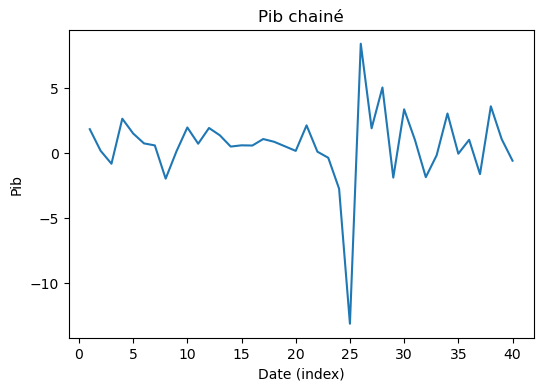

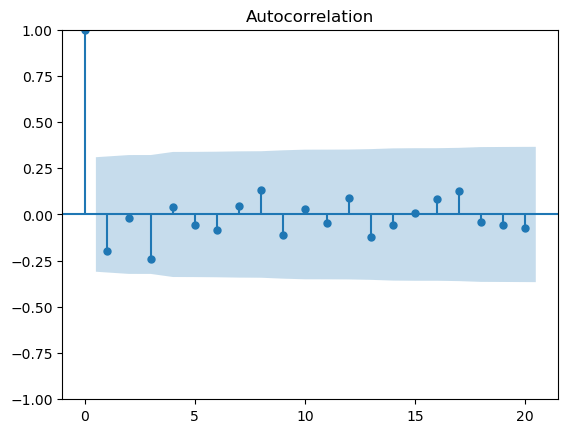

ADF Statistic: -7.426631364823009
p-value: 6.522762155369057e-11
Critical Value 1%: -3.610399601308181
Critical Value 5%: -2.939108945868946
Critical Value 10%: -2.6080629651545038


In [43]:
fig, ax = plt.subplots(figsize=(6,4))
y1 = pib_Q
y1=y1.tolist() 
x1 = [i for i in range(1, len(y1) + 1)]

ax.plot(x1, y1)
ax.set_title("Pib chainé")
ax.set_xlabel("Date (index)")
ax.set_ylabel("Pib")
plt.show()

# 2. Tracer l'ACF pour le taux de croissance du PIB réel
plot_acf(y1, lags=20)
plt.show()

# 3. Effectuer le test ADF (Augmented Dickey-Fuller) pour vérifier la stationnarité
adf_result = adfuller(y1)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

In [44]:
import pandas as pd

# Chargement des données
nd = pd.read_csv("ndv.csv", sep=",", index_col="date")

# Suppression des colonnes non nécessaires et gestion des valeurs manquantes
nd = nd.drop(columns=[".geo", "system:index"])
nd = nd.astype(float).round(2)

# Transformer l'index en chaîne de caractères
nd.index = nd.index.astype(str)

# Ajouter "01" à la fin de chaque date pour créer un format 'YYYY-MM-01'
nd.index = nd.index + '-01'

# Convertir l'index en format datetime
nd.index = pd.to_datetime(nd.index, format='%Y-%m-%d')

# Ajuster la date au dernier jour du mois
nd.index = nd.index + pd.offsets.MonthEnd(0)

# Convertir l'index en format 'YYYY-MM-DD'
nd.index = nd.index.strftime('%Y-%m-%d')
nd=nd.loc[:"2024-07-31"]
# Afficher les premières lignes du DataFrame
print(nd.loc["2024-01-31"])


NDVI               NaN
Precipitation    11.36
Name: 2024-01-31, dtype: float64


In [45]:
nd_st=np.log(nd).diff()*100
nd_st.head()

,NDVI,Precipitation
date,,
2014-01-31,NaN,NaN
2014-02-28,8.164862,-64.447944
2014-03-31,2.259234,20.874062
2014-04-30,-2.831066,-17.219809
2014-05-31,-10.965550,-41.400001


In [46]:
X_M.index = X_M.index.strftime('%Y-%m-%d')

X_M = pd.concat([
    X_M, nd_st
], axis=1)
X_M.head()

,IPP_Extractives,IPP_Manufacturing,IPP_Electricity,IPP_Water,M1,M2,M3,Créances des ID,Créances des AID,Créances de BAM,...,Taux_intq_fin_du_mois,tx_occupation,imports,exports,IPC,PL 1,PL 2,PL,NDVI,Precipitation
2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.09,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,0.0,0.000000,0.0,0.0,0.129335,0.229734,0.352810,0.512339,0.513427,-0.502603,...,3.09,42.0,-1.014627,2.905485,0.0,7.042798,5.379628,6.260358,8.164862,-64.447944
2014-03-31,0.0,0.000000,0.0,0.0,0.802580,0.784992,0.390285,1.544765,1.534713,10.550003,...,3.02,45.0,16.877059,11.182768,0.0,2.867245,4.343555,3.186849,2.259234,20.874062
2014-04-30,0.0,0.000000,0.0,0.0,1.225384,1.113610,0.953077,-0.414684,-0.405850,-8.283996,...,3.05,52.0,-2.068806,0.193386,0.0,-0.208275,4.449268,1.290198,-2.831066,-17.219809
2014-05-31,0.0,-1.834914,0.0,0.0,-0.931023,-0.747456,1.411619,1.294884,1.307412,-11.049738,...,3.00,47.0,-8.630181,0.808163,0.0,3.298764,1.849775,2.923180,-10.965550,-41.400001


Test de la stationnarité avec traitement pour le DataFrame X_M :

Analyse de la colonne IPP_Extractives dans X_M
P-valeur ADF initiale pour IPP_Extractives : 0.0000
Colonne IPP_Extractives dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne IPP_Manufacturing dans X_M
P-valeur ADF initiale pour IPP_Manufacturing : 0.0000
Colonne IPP_Manufacturing dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne IPP_Electricity dans X_M
P-valeur ADF initiale pour IPP_Electricity : 0.2208
Résultats de la régression pour la colonne IPP_Electricity :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.620
Date:                Thu, 19 Sep 2024   Prob (F-statistic):             0.0606
Tim

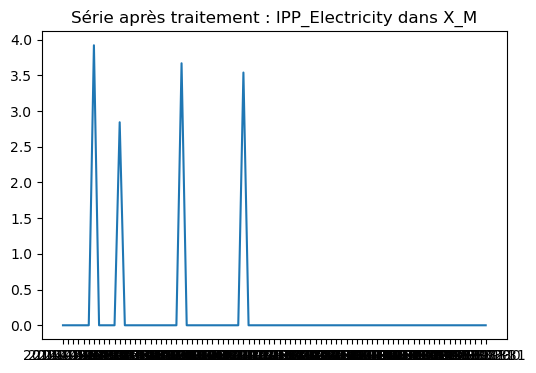

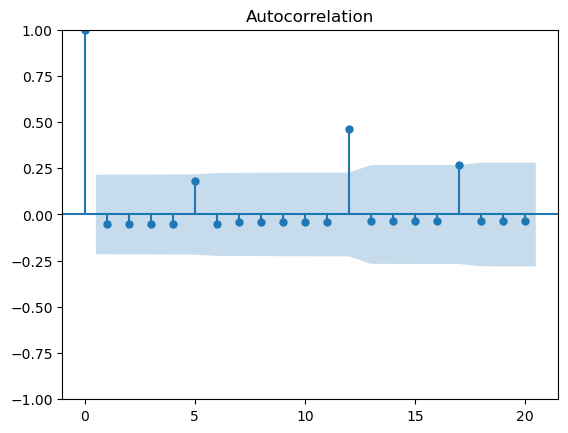


Analyse de la colonne IPP_Water dans X_M
P-valeur ADF initiale pour IPP_Water : 0.0398
Colonne IPP_Water dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne M1 dans X_M
P-valeur ADF initiale pour M1 : 0.0938
Résultats de la régression pour la colonne M1 :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5493
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.460
Time:                        14:38:34   Log-Likelihood:                -205.99
No. Observations:                 126   AIC:                             416.0
Df Residuals:                     124   BIC:                             421.7
Df Model:                           1                                         


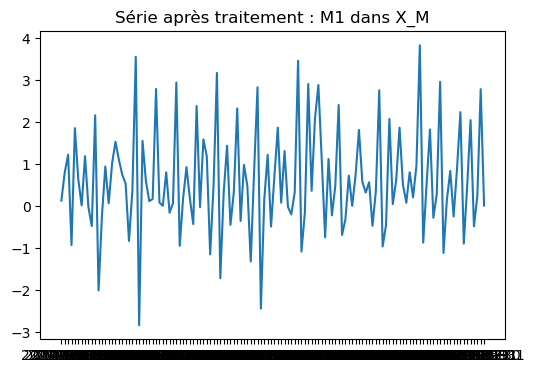

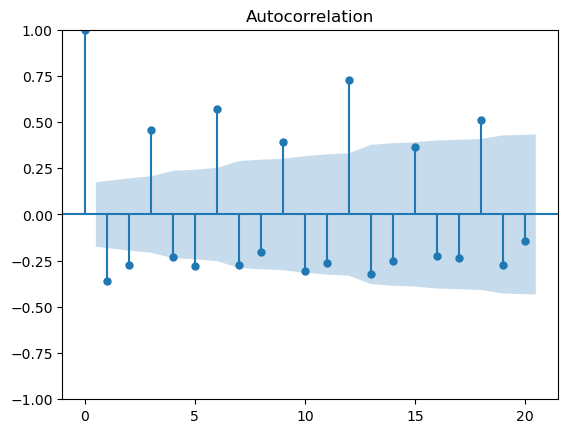


Analyse de la colonne M2 dans X_M
P-valeur ADF initiale pour M2 : 0.0871
Résultats de la régression pour la colonne M2 :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3508
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.555
Time:                        14:38:35   Log-Likelihood:                -184.64
No. Observations:                 126   AIC:                             373.3
Df Residuals:                     124   BIC:                             378.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

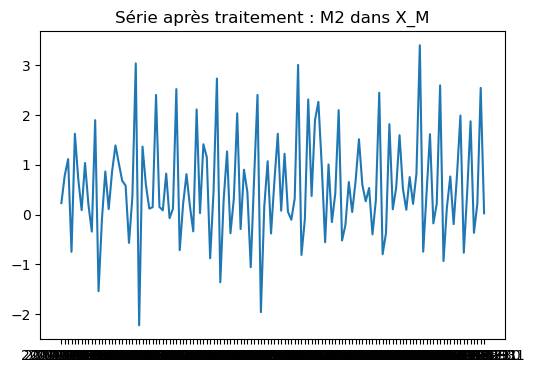

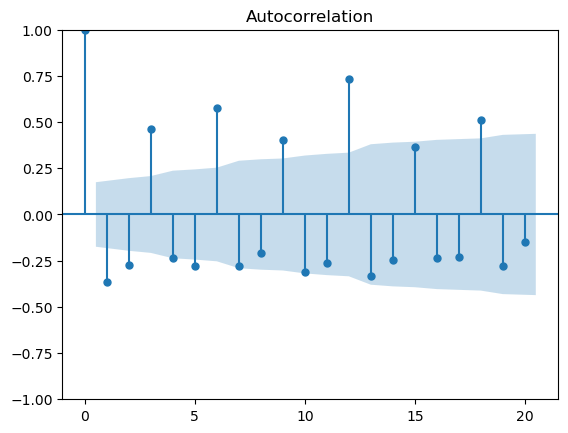


Analyse de la colonne M3 dans X_M
P-valeur ADF initiale pour M3 : 0.0236
Colonne M3 dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne Créances des ID  dans X_M
P-valeur ADF initiale pour Créances des ID  : 0.0140
Colonne Créances des ID  dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne Créances des AID dans X_M
P-valeur ADF initiale pour Créances des AID : 0.0138
Colonne Créances des AID dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne Créances  de BAM dans X_M
P-valeur ADF initiale pour Créances  de BAM : 0.0000
Colonne Créances  de BAM dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne  Fuel  dans X_M
P-valeur ADF initiale pour  Fuel  : 0.0540
Résultats de la régression pour la colonne  Fuel  :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.00

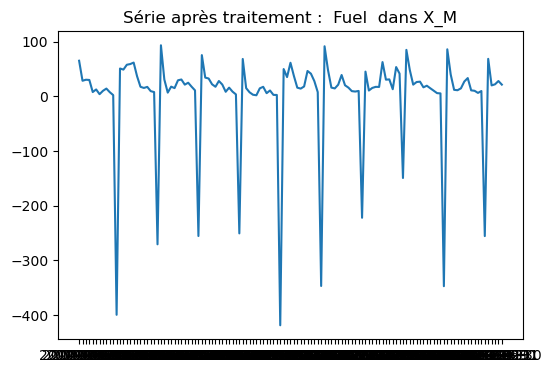

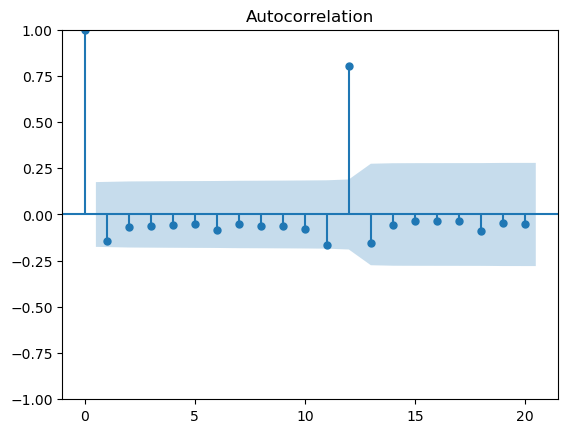


Analyse de la colonne Charbon local  dans X_M
P-valeur ADF initiale pour Charbon local  : 0.1253
Résultats de la régression pour la colonne Charbon local  :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.07688
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.782
Time:                        14:38:40   Log-Likelihood:                -721.50
No. Observations:                 125   AIC:                             1447.
Df Residuals:                     123   BIC:                             1453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

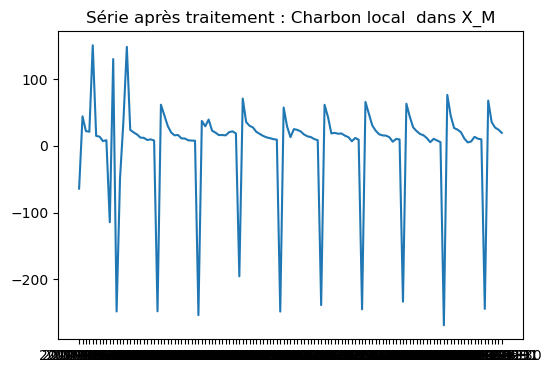

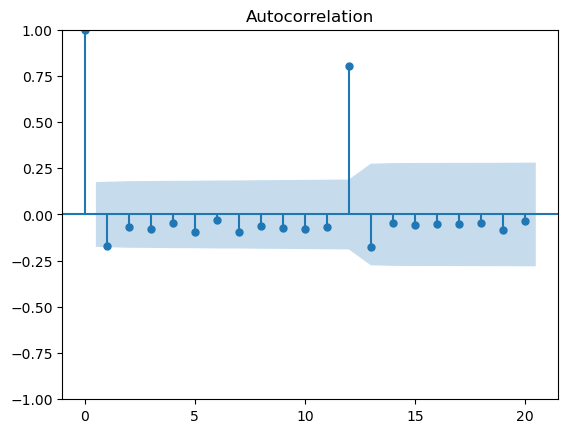


Analyse de la colonne Charbon importé  dans X_M
P-valeur ADF initiale pour Charbon importé  : 0.0000
Colonne Charbon importé  dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne Petcoke  dans X_M
P-valeur ADF initiale pour Petcoke  : 0.0123
Colonne Petcoke  dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne  Gasoil  dans X_M
P-valeur ADF initiale pour  Gasoil  : 0.0830
Résultats de la régression pour la colonne  Gasoil  :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.06556
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.798
Time:                        14:38:42   Log-Likelihood:                -730.87
No. Observations:                 

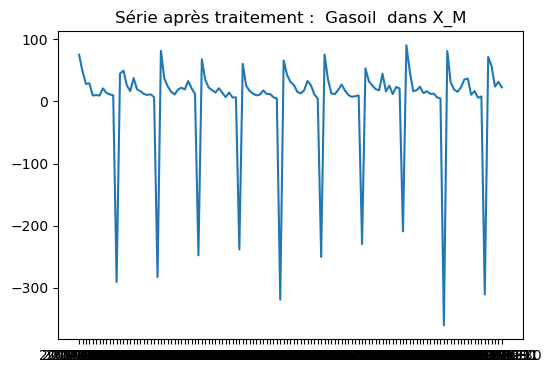

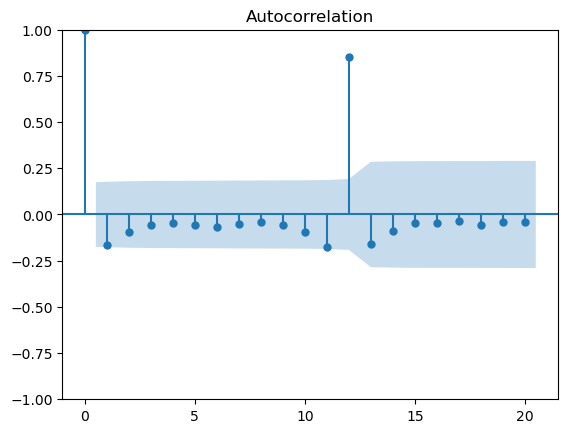


Analyse de la colonne Taux_intq_moyen dans X_M
P-valeur ADF initiale pour Taux_intq_moyen : 0.1426
Résultats de la régression pour la colonne Taux_intq_moyen :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     9.388
Date:                Thu, 19 Sep 2024   Prob (F-statistic):            0.00268
Time:                        14:38:45   Log-Likelihood:                -81.500
No. Observations:                 125   AIC:                             167.0
Df Residuals:                     123   BIC:                             172.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

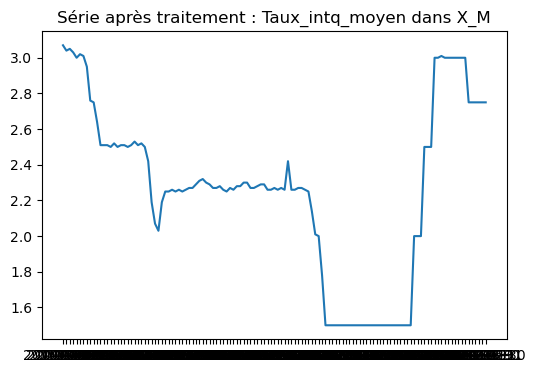

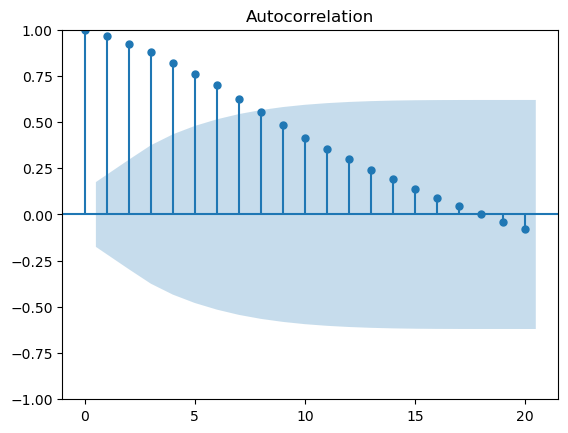


Analyse de la colonne Taux_intq_fin_du_mois dans X_M
P-valeur ADF initiale pour Taux_intq_fin_du_mois : 0.1689
Résultats de la régression pour la colonne Taux_intq_fin_du_mois :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.86
Date:                Thu, 19 Sep 2024   Prob (F-statistic):            0.00128
Time:                        14:38:48   Log-Likelihood:                -81.066
No. Observations:                 125   AIC:                             166.1
Df Residuals:                     123   BIC:                             171.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std er

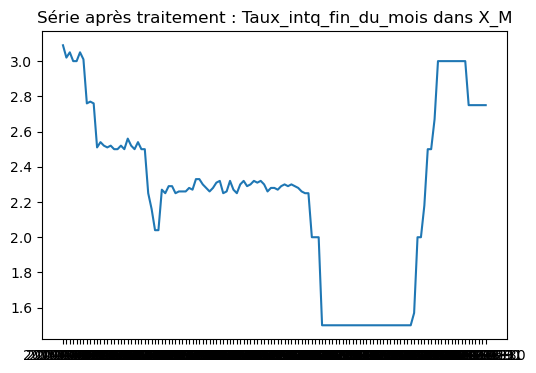

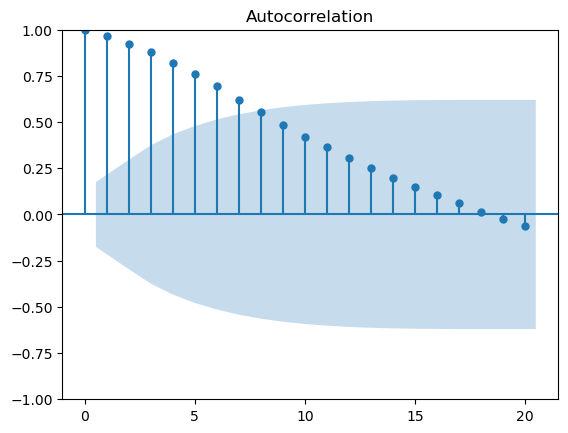


Analyse de la colonne tx_occupation dans X_M
P-valeur ADF initiale pour tx_occupation : 0.0000
Colonne tx_occupation dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne imports dans X_M
P-valeur ADF initiale pour imports : 0.0000
Colonne imports dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne exports dans X_M
P-valeur ADF initiale pour exports : 0.0000
Colonne exports dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne IPC dans X_M
P-valeur ADF initiale pour IPC : 0.2272
Résultats de la régression pour la colonne IPC :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.984
Date:                Thu, 19 Sep 2024   Prob (F-statistic)

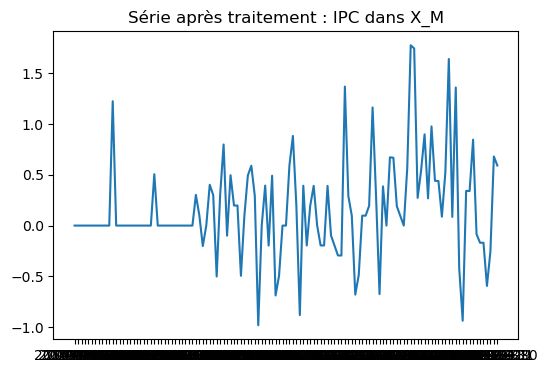

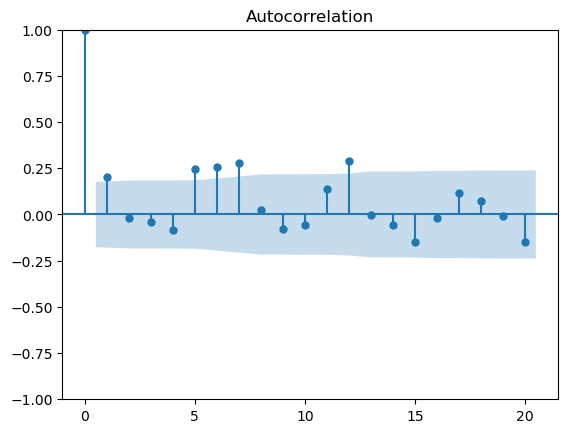


Analyse de la colonne PL 1 dans X_M
P-valeur ADF initiale pour PL 1 : 0.0000
Colonne PL 1 dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne PL 2 dans X_M
P-valeur ADF initiale pour PL 2 : 0.0002
Colonne PL 2 dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne PL dans X_M
P-valeur ADF initiale pour PL : 0.0000
Colonne PL dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne NDVI dans X_M
P-valeur ADF initiale pour NDVI : 0.0000
Colonne NDVI dans X_M est déjà stationnaire. Aucun traitement nécessaire.

Analyse de la colonne Precipitation dans X_M
P-valeur ADF initiale pour Precipitation : 0.0000
Colonne Precipitation dans X_M est déjà stationnaire. Aucun traitement nécessaire.
Test de la stationnarité avec traitement pour le DataFrame cho_emp :

Analyse de la colonne Experienced_Unemployed dans cho_emp
P-valeur ADF initiale pour Experienced_Unemployed : 0.3076
Résultats de la régression pour 

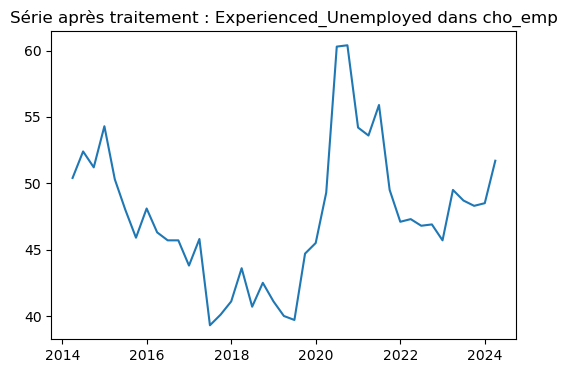

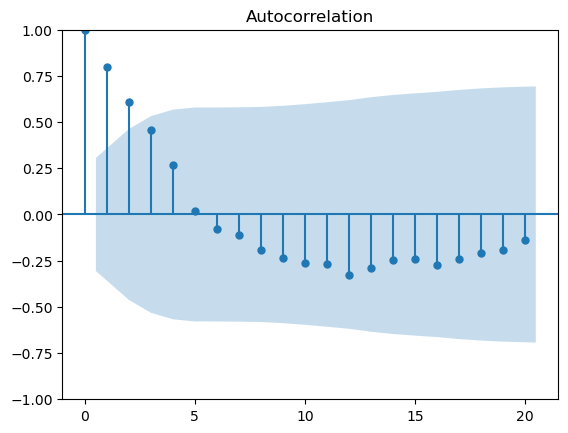


Analyse de la colonne First_Time_Unemployed dans cho_emp
P-valeur ADF initiale pour First_Time_Unemployed : 0.3087
Résultats de la régression pour la colonne First_Time_Unemployed :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8003
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.376
Time:                        14:38:52   Log-Likelihood:                -124.54
No. Observations:                  41   AIC:                             253.1
Df Residuals:                      39   BIC:                             256.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

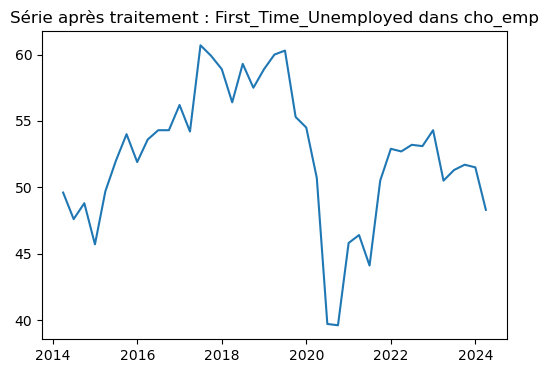

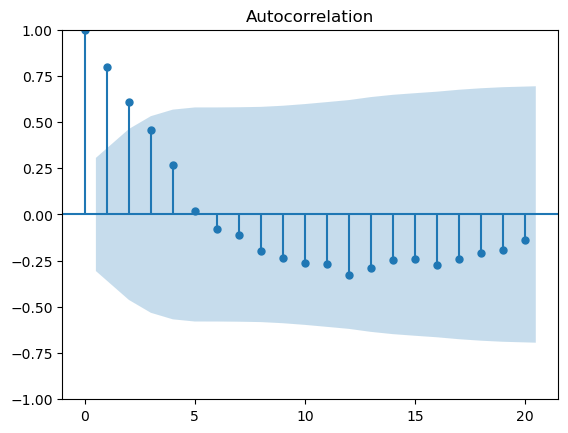


Analyse de la colonne Agriculture_Employment dans cho_emp
P-valeur ADF initiale pour Agriculture_Employment : 0.9532
Résultats de la régression pour la colonne Agriculture_Employment :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     501.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           7.15e-24
Time:                        14:38:53   Log-Likelihood:                -62.297
No. Observations:                  41   AIC:                             128.6
Df Residuals:                      39   BIC:                             132.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

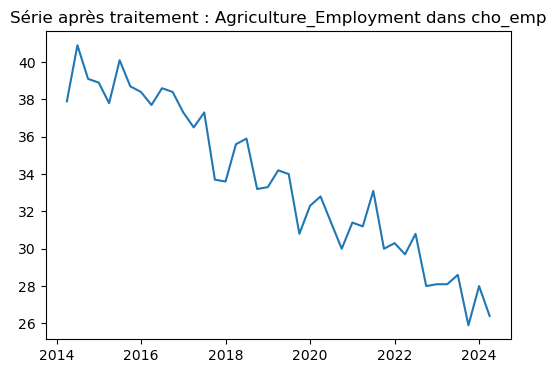

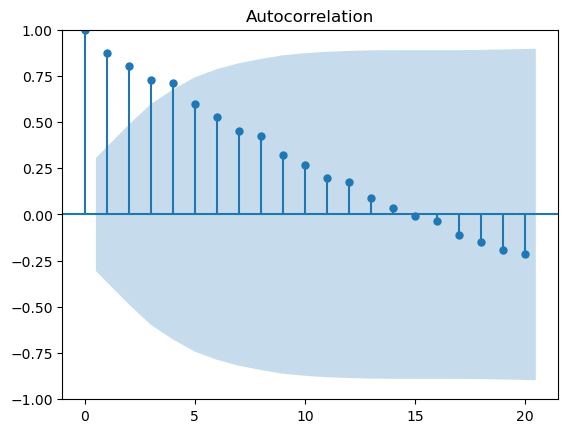


Analyse de la colonne Industry_Employment dans cho_emp
P-valeur ADF initiale pour Industry_Employment : 0.9273
Résultats de la régression pour la colonne Industry_Employment :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     106.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.01e-12
Time:                        14:38:54   Log-Likelihood:                -39.659
No. Observations:                  41   AIC:                             83.32
Df Residuals:                      39   BIC:                             86.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

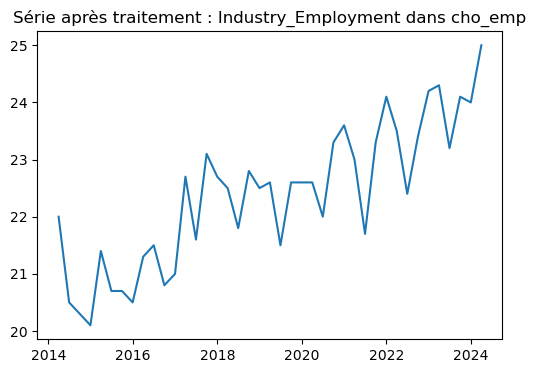

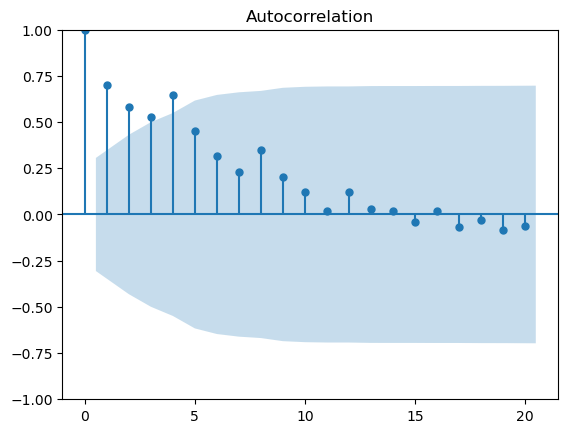


Analyse de la colonne Services_Employment dans cho_emp
P-valeur ADF initiale pour Services_Employment : 0.9742
Résultats de la régression pour la colonne Services_Employment :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     429.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.17e-22
Time:                        14:38:55   Log-Likelihood:                -53.115
No. Observations:                  41   AIC:                             110.2
Df Residuals:                      39   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

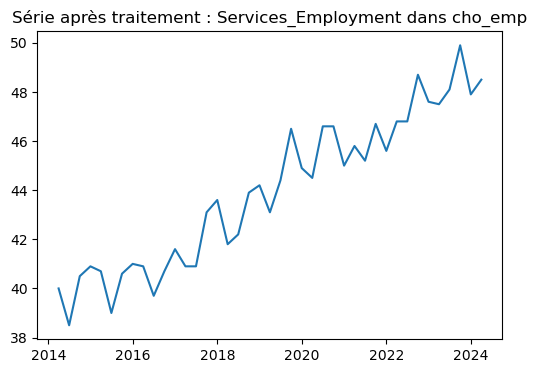

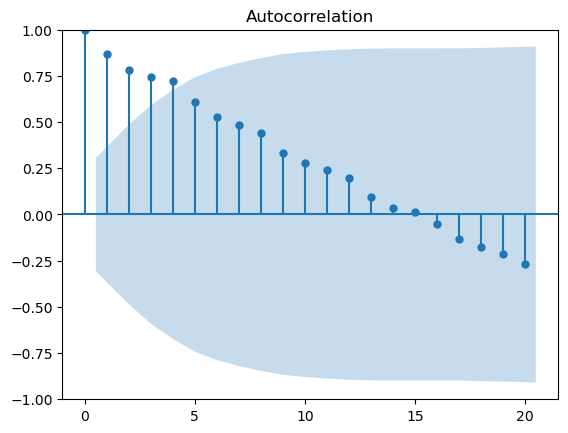

X_M après traitement stationnarité :
            IPP_Extractives  IPP_Manufacturing  IPP_Electricity  IPP_Water  \
2014-02-28              0.0           0.000000              0.0        0.0   
2014-03-31              0.0           0.000000              0.0        0.0   
2014-04-30              0.0           0.000000              0.0        0.0   
2014-05-31              0.0          -1.834914              0.0        0.0   
2014-06-30              0.0           0.000000              0.0        0.0   

                  M1        M2        M3  Créances des ID   Créances des AID  \
2014-02-28  0.129335  0.229734  0.352810          0.512339          0.513427   
2014-03-31  0.802580  0.784992  0.390285          1.544765          1.534713   
2014-04-30  1.225384  1.113610  0.953077         -0.414684         -0.405850   
2014-05-31 -0.931023 -0.747456  1.411619          1.294884          1.307412   
2014-06-30  1.858155  1.623306  1.551650          2.496726          2.493950   

            C

In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Fonction pour tester la stationnarité et retirer la tendance si nécessaire
def check_stationarity_with_detrending(dff, name):
    df=dff.copy()
    for col in df.columns:
        # Vérifier si la colonne n'est pas vide
        data = df[col].dropna().tolist()
        if len(data) == 0:
            print(f"La colonne {col} dans {name} est vide ou contient uniquement des NaN. Ignorée.")
            continue

        print(f"\nAnalyse de la colonne {col} dans {name}")

        # Tester la stationnarité initiale
        adf_result_original = adfuller(data)
        p_value_original = adf_result_original[1]
        print(f"P-valeur ADF initiale pour {col} : {p_value_original:.4f}")
        
        if p_value_original <= 0.05:
            print(f"Colonne {col} dans {name} est déjà stationnaire. Aucun traitement nécessaire.")
            continue

        # Tester la tendance avec une régression linéaire
        x_values = np.arange(len(data)) + 1
        model = sm.OLS(data, sm.add_constant(x_values))
        result = model.fit()

        # Vérifier si le coefficient de la pente est significatif (tendance)
        print(f"Résultats de la régression pour la colonne {col} :")
        print(result.summary())

        if result.pvalues[1] < 0.05:
            detrended_data = result.resid
            print(f"Tendance détectée et retirée pour la colonne {col} dans {name}.")

            # Vérifier la stationnarité après dé-trend
            adf_result = adfuller(detrended_data)
            p_value = adf_result[1]
            print(f"P-valeur ADF après dé-trend pour {col} : {p_value:.4f}")
            
            if p_value > 0.05:
                print(f"Colonne {col} dans {name} toujours non stationnaire après dé-trend. Application de la différenciation sur la série de base.")
                transformed_data = np.diff(data)  # Différenciation de la série de base
        
            else:
                print(f"Colonne {col} dans {name} est stationnaire après dé-trend.")
                
        else:
            print(f"Aucune tendance détectée pour la colonne {col} dans {name}. Application directe de la différenciation.")
            transformed_data = np.diff(data)  # Différenciation
        

        # Tracer la série après traitement et l'ACF
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(df[col].dropna())
        ax.set_title(f"Série après traitement : {col} dans {name}")
        plt.show()

        plot_acf(df[col].dropna(), lags=20)
        plt.show()

    return df

# Appliquer sur X_M et cho_emp (en supposant que X_M et cho_emp sont définis)
print("Test de la stationnarité avec traitement pour le DataFrame X_M :")
X_M_stationary = check_stationarity_with_detrending(X_M.loc["2014-02-28":], "X_M")

print("Test de la stationnarité avec traitement pour le DataFrame cho_emp :")
cho_emp_stationary = check_stationarity_with_detrending(cho_emp, "cho_emp")

# Afficher les premières lignes des DataFrames transformés
print("X_M après traitement stationnarité :")
print(X_M_stationary.head())

print("cho_emp après traitement stationnarité :")
print(cho_emp_stationary.head())


In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    # Listes pour classer les colonnes selon leur niveau de stationnarité
    stationary_initial = []
    stationary_after_diff = []
    stationary_after_detrend = []
    still_non_stationary = []

    for col in df.columns:
        data = df[col].dropna().tolist()

        if len(data) == 0:
            print(f"La colonne {col} est vide ou contient uniquement des NaN.")
            continue

        print(f"\nVérification de la stationnarité pour la colonne {col}...")

        # 1. Vérification initiale de la stationnarité
        adf_result_initial = adfuller(data)
        p_value_initial = adf_result_initial[1]
        if p_value_initial <= 0.05:
            stationary_initial.append(col)
            print(f"La colonne {col} est stationnaire initialement (p-valeur ADF : {p_value_initial:.4f}).")
            continue
        
        # 2. Si non stationnaire, appliquer la différenciation et vérifier à nouveau
        diff_data = np.diff(data)
        adf_result_diff = adfuller(diff_data)
        p_value_diff = adf_result_diff[1]
        if p_value_diff <= 0.05:
            stationary_after_diff.append(col)
            print(f"La colonne {col} est stationnaire après différenciation (p-valeur ADF : {p_value_diff:.4f}).")
            continue

        # 3. Si toujours non stationnaire, appliquer le dé-trend et vérifier
        x_values = np.arange(len(data)) + 1  # Génère un index temporel
        model = sm.OLS(data, sm.add_constant(x_values))
        result = model.fit()
        detrended_data = result.resid  # Résidus de la régression (données détrendées)
        
        adf_result_detrend = adfuller(detrended_data)
        p_value_detrend = adf_result_detrend[1]
        if p_value_detrend <= 0.05:
            stationary_after_detrend.append(col)
            print(f"La colonne {col} est stationnaire après dé-trend (p-valeur ADF : {p_value_detrend:.4f}).")
        else:
            still_non_stationary.append(col)
            print(f"La colonne {col} reste non stationnaire (p-valeur ADF après dé-trend : {p_value_detrend:.4f}).")

    # Résumé des résultats
    print("\nRésumé des colonnes stationnaires :")
    print(f"Stationnaire initialement : {stationary_initial}")
    print(f"Stationnaire après différenciation : {stationary_after_diff}")
    print(f"Stationnaire après dé-trend : {stationary_after_detrend}")
    print(f"Encore non stationnaire : {still_non_stationary}")

    return  stationary_initial, stationary_after_diff, stationary_after_detrend,  still_non_stationary
    

# Utilisation sur X_M et cho_emp
print("Vérification de la stationnarité pour le DataFrame X_M :")
result_X_M = check_stationarity(X_M)

print("\nVérification de la stationnarité pour le DataFrame cho_emp :")
result_cho_emp = check_stationarity(cho_emp)


Vérification de la stationnarité pour le DataFrame X_M :

Vérification de la stationnarité pour la colonne IPP_Extractives...
La colonne IPP_Extractives est stationnaire initialement (p-valeur ADF : 0.0000).

Vérification de la stationnarité pour la colonne IPP_Manufacturing...
La colonne IPP_Manufacturing est stationnaire initialement (p-valeur ADF : 0.0000).

Vérification de la stationnarité pour la colonne IPP_Electricity...
La colonne IPP_Electricity est stationnaire après différenciation (p-valeur ADF : 0.0000).

Vérification de la stationnarité pour la colonne IPP_Water...
La colonne IPP_Water est stationnaire initialement (p-valeur ADF : 0.0398).

Vérification de la stationnarité pour la colonne M1...
La colonne M1 est stationnaire après différenciation (p-valeur ADF : 0.0000).

Vérification de la stationnarité pour la colonne M2...
La colonne M2 est stationnaire après différenciation (p-valeur ADF : 0.0000).

Vérification de la stationnarité pour la colonne M3...
La colonne M3 

In [49]:
stationary_after_diff=['Experienced_Unemployed', 'First_Time_Unemployed', 'Industry_Employment', 'Services_Employment','IPP_Electricity', 'M1', 'M2', ' Fuel ', 'Charbon local ', ' Gasoil ', 'Taux_intq_moyen', 'Taux_intq_fin_du_mois', 'IPC']
def apply_differentiation(df, stationary_after_diff):
    for col in df.columns:
        if col in stationary_after_diff:
            print(f"Application de la différenciation à la colonne {col}.")
            df[col] = df[col].diff()  # Appliquer la différenciation
        else:
            print(f"Aucune différenciation nécessaire pour la colonne {col}.")
    return df

# Exemple d'exécution pour X_M et cho_emp
X_M_diff = apply_differentiation(X_M.copy(), stationary_after_diff)
cho_emp_diff = apply_differentiation(cho_emp.copy(), stationary_after_diff)

# Afficher un aperçu des DataFrames après différenciation
print("\nX_M après différenciation :")
print(X_M_diff.head())



Aucune différenciation nécessaire pour la colonne IPP_Extractives.
Aucune différenciation nécessaire pour la colonne IPP_Manufacturing.
Application de la différenciation à la colonne IPP_Electricity.
Aucune différenciation nécessaire pour la colonne IPP_Water.
Application de la différenciation à la colonne M1.
Application de la différenciation à la colonne M2.
Aucune différenciation nécessaire pour la colonne M3.
Aucune différenciation nécessaire pour la colonne Créances des ID .
Aucune différenciation nécessaire pour la colonne Créances des AID.
Aucune différenciation nécessaire pour la colonne Créances  de BAM.
Application de la différenciation à la colonne  Fuel .
Application de la différenciation à la colonne Charbon local .
Aucune différenciation nécessaire pour la colonne Charbon importé .
Aucune différenciation nécessaire pour la colonne Petcoke .
Application de la différenciation à la colonne  Gasoil .
Application de la différenciation à la colonne Taux_intq_moyen.
Application 

In [50]:
import statsmodels.api as sm
stationary_after_detrend=['Agriculture_Employment']
def apply_detrending(df, stationary_after_detrend):
    for col in df.columns:
        if col in stationary_after_detrend:
            print(f"Application du dé-trend à la colonne {col}.")
            data = df[col].dropna()  # Enlever les NaN pour l'ajustement
            x_values = np.arange(len(data)) + 1  # Index temporel
            model = sm.OLS(data, sm.add_constant(x_values))
            result = model.fit()
            df[col] = result.resid  # Remplacer par les résidus (données détrendées)
        else:
            print(f"Aucun dé-trend nécessaire pour la colonne {col}.")
    return df

cho_emp_detrended = apply_detrending(cho_emp_diff.copy(), stationary_after_detrend)

print("\ncho_emp après dé-trend :")
print(cho_emp_detrended.head())


Aucun dé-trend nécessaire pour la colonne Experienced_Unemployed.
Aucun dé-trend nécessaire pour la colonne First_Time_Unemployed.
Application du dé-trend à la colonne Agriculture_Employment.
Aucun dé-trend nécessaire pour la colonne Industry_Employment.
Aucun dé-trend nécessaire pour la colonne Services_Employment.

cho_emp après dé-trend :
            Experienced_Unemployed  First_Time_Unemployed  \
2014-03-31                     NaN                    NaN   
2014-06-30                     2.0                   -2.0   
2014-09-30                    -1.2                    1.2   
2014-12-31                     3.1                   -3.1   
2015-03-31                    -4.0                    4.0   

            Agriculture_Employment  Industry_Employment  Services_Employment  
2014-03-31               -2.412544                  NaN                  NaN  
2014-06-30                0.922596                 -1.5                 -1.5  
2014-09-30               -0.542265                 -

In [52]:

X_Q=cho_emp_diff.dropna()   
X_Mo=X_M_diff.loc["2014-06-30": "2024-03-31"] 
for col in X_Mo.columns:
    nan_ = X_Mo[X_Mo[col].isna()].index
    print(nan_)

Index(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
       '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
       '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31'],
      dtype='object')
Index(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
       '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '202

In [53]:
import pandas as pd
import numpy as np
import pmdarima as pm
from datetime import datetime


def fill_missing_with_arima(df):
    # Liste pour stocker les modèles ARIMA
    arima_models = []
    
    # Parcourir chaque colonne
    for col in df.columns:
        data = df[col]
        
        # Vérifier les indices avec NaN
        if data.isna().any():
            print(f"Processing column: {col}")
            
            # Diviser les données en observations connues et inconnues
            known_data = data.dropna()
            missing_indices = data[data.isna()].index
            
            # Entraîner un modèle ARIMA
            model = pm.auto_arima(known_data, seasonal=False, suppress_warnings=True, stepwise=True)
            arima_models.append((col, model))
            print(f"Best model for {col}:", model)
            
            # Prédire les valeurs manquantes
            start_date = missing_indices[0]
            end_date = df.index[-1]
            forecast_index = pd.date_range(start=start_date, end=end_date, freq='M')  # Assurez-vous que la fréquence est correcte
            forecast_length = len(forecast_index)
            
            # Préparer les données pour la prévision
            train_data = known_data.reindex(pd.date_range(start=known_data.index[0], end=end_date, freq='M'))
            forecast = model.predict(n_periods=forecast_length)
            
            # Remplir les valeurs manquantes
            df.loc[start_date:end_date, col] = pd.Series(forecast, index=forecast_index)
    
    return df, arima_models

# Exemple d'exécution
X_Mo_filled, arima_models = fill_missing_with_arima(X_Mo.copy())

# Afficher les premières lignes du DataFrame après imputation
print("\nX_Mo après imputation :")
print(X_Mo_filled.head())


Processing column: IPP_Extractives
Best model for IPP_Extractives:  ARIMA(2,0,4)(0,0,0)[0]          
Processing column: IPP_Manufacturing
Best model for IPP_Manufacturing:  ARIMA(0,0,0)(0,0,0)[0]          
Processing column: IPP_Electricity
Best model for IPP_Electricity:  ARIMA(0,0,1)(0,0,0)[0]          
Processing column: IPP_Water
Best model for IPP_Water:  ARIMA(5,1,1)(0,0,0)[0]          
Processing column: tx_occupation
Best model for tx_occupation:  ARIMA(0,0,1)(0,0,0)[0] intercept
Processing column: imports
Best model for imports:  ARIMA(1,0,2)(0,0,0)[0]          
Processing column: exports
Best model for exports:  ARIMA(2,0,2)(0,0,0)[0]          
Processing column: NDVI
Best model for NDVI:  ARIMA(2,0,1)(0,0,0)[0]          

X_Mo après imputation :
            IPP_Extractives  IPP_Manufacturing  IPP_Electricity  IPP_Water  \
2014-06-30              0.0           0.000000         0.000000   0.000000   
2014-07-31              0.0           0.921666         0.000000   0.000000   

In [55]:
import pandas as pd
from scipy.stats import pearsonr
X_Mo_filled.index = pd.to_datetime(X_Mo_filled.index)
# 1. Convertir X_Mo_filled en données trimestrielles
X_Mo_filled_trimestriel = X_Mo_filled.resample('Q').mean()

# 2. Concaténer X_Mo_filled_trimestriel et cho_emp_detrended
combined_df = pd.concat([X_Mo_filled_trimestriel, cho_emp_detrended], axis=1)

combined_df_aligned, pib_Q_aligned = combined_df.align(pib_Q, join='inner', axis=0)

# 4. Calculer la corrélation et la p-value entre chaque colonne de combined_df et pib_Q
def compute_correlations(df, target_series):
    results = []
    for col in df.columns:
        corr, p_value = pearsonr(df[col].dropna(), target_series.dropna())
        results.append((col, corr, p_value))
        print(f"Colonne {col} - Corrélation : {corr:.4f}, P-value : {p_value:.4f}")
    
    return results

# Appliquer la fonction de corrélation
correlation_results = compute_correlations(combined_df_aligned, pib_Q_aligned)


Colonne IPP_Extractives - Corrélation : -0.0375, P-value : 0.8184
Colonne IPP_Manufacturing - Corrélation : 0.2263, P-value : 0.1602
Colonne IPP_Electricity - Corrélation : 0.2419, P-value : 0.1326
Colonne IPP_Water - Corrélation : -0.0361, P-value : 0.8248
Colonne M1 - Corrélation : -0.0995, P-value : 0.5413
Colonne M2 - Corrélation : -0.0845, P-value : 0.6041
Colonne M3 - Corrélation : -0.3380, P-value : 0.0329
Colonne Créances des ID  - Corrélation : -0.1780, P-value : 0.2719
Colonne Créances des AID - Corrélation : -0.1776, P-value : 0.2730
Colonne Créances  de BAM - Corrélation : -0.0105, P-value : 0.9488
Colonne  Fuel  - Corrélation : 0.0805, P-value : 0.6213
Colonne Charbon local  - Corrélation : 0.0478, P-value : 0.7698
Colonne Charbon importé  - Corrélation : -0.0217, P-value : 0.8944
Colonne Petcoke  - Corrélation : 0.0486, P-value : 0.7659
Colonne  Gasoil  - Corrélation : 0.0005, P-value : 0.9974
Colonne Taux_intq_moyen - Corrélation : 0.2492, P-value : 0.1210
Colonne Taux_i

                            OLS Regression Results                            
Dep. Variable:             PIB chainé   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     7.425
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           2.03e-05
Time:                        20:35:33   Log-Likelihood:                -72.787
No. Observations:                  38   AIC:                             179.6
Df Residuals:                      21   BIC:                             207.4
Df Model:                          16                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

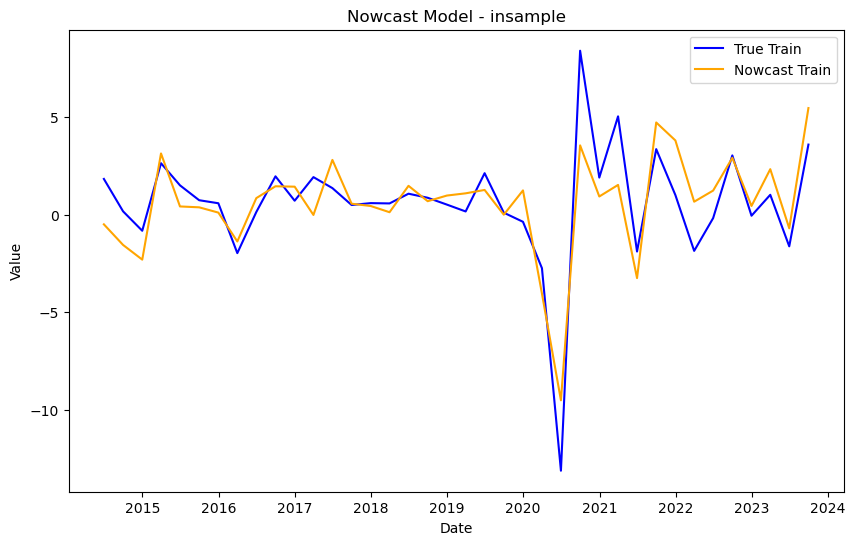

In [116]:
pib_Q.columns=["pib_Q"]
# Définir la date de séparation pour train et test
split_date = '2023-09-30'
combined_df=combined_df.loc["2014-06-30":]
# Séparer les données X et y en ensembles d'entraînement et de test
X_train_MQ = combined_df.loc[combined_df.index <= split_date, ['M3', 'IPC', 'IPP_Manufacturing', 
                                                               'Experienced_Unemployed', 'First_Time_Unemployed',
                                                               'Agriculture_Employment', 'Industry_Employment', 
                                                               'Créances des AID', 'Créances des ID ', 
                                                               ' Fuel ', ' Gasoil ', 'exports', 'imports', 
                                                               'Taux_intq_fin_du_mois', 'PL', 'Precipitation']]

X_test_MQ = combined_df.loc[combined_df.index >= split_date, ['M3', 'IPC', 'IPP_Manufacturing', 
                                                             'Experienced_Unemployed', 'First_Time_Unemployed',
                                                             'Agriculture_Employment', 'Industry_Employment', 
                                                             'Créances des AID', 'Créances des ID ', 
                                                             ' Fuel ', ' Gasoil ', 'exports', 'imports', 
                                                             'Taux_intq_fin_du_mois', 'PL', 'Precipitation']]

# Même chose pour y (variable à prédire)
y_train = pib_Q.loc[pib_Q.index <= split_date]
y_test = pib_Q.loc[pib_Q.index >= split_date]

# Ajout de la constante pour les ensembles de train et test
X_train = sm.add_constant(X_train_MQ)
X_test = sm.add_constant(X_test_MQ)

# Entraînement du modèle sur l'ensemble d'entraînement
bridgemodel = sm.OLS(y_train, X_train)
results_bridge = bridgemodel.fit(cov_type='HAC', cov_kwds={'maxlags': 4})

# Résumé du modèle
print(results_bridge.summary())

# Prédictions en sample (train)
insample_pred_bridge = results_bridge.predict(X_train)

# Prédictions hors sample (test)
#outsample_pred_bridge = results_bridge.predict(X_test)

# Plot des résultats pour les données d'entraînement
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='True Train', color='blue')
plt.plot(y_train.index, insample_pred_bridge, label='Nowcast Train', color='orange')

# Ajout des résultats pour les données de test
#plt.plot(y_test.index, y_test['pib_Q'], label='True Test', color='green')
#plt.plot(y_test.index, outsample_pred_bridge, label='Nowcast Test', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Nowcast Model - insample')
plt.show()


In [135]:
r2_bridge = r2_score(y_train, insample_pred_bridge)
print(r2_bridge)
mse_bridge = ofsperformance(y_train, insample_pred_bridge)
print(mse_bridge)

0.7043097042407491
mean absolute error: 1.2512734293435979
mean absolute percentage error: 1.7687811869812702
root mean square error: 1.642960088475578
real time root-mean-squared-forecast-error: [2.3281596286966773, 2.047921694728628, 1.8778983408423078, 1.645366258949291, 1.5492216728069248, 1.422026984047021, 1.328960113499687, 1.2609280942387542, 1.212316432019103, 1.1613399925925392, 1.128387067584272, 1.216947394882215, 1.2360305583349314, 1.1912028237161503, 1.151449225577121, 1.120576683384157, 1.0915205171775544, 1.0615799357864317, 1.0387237429353002, 1.033559540775604, 1.0259246785831533, 1.002580539260389, 1.0364002610285952, 1.048934600031933, 1.2560974393854607, 1.5564914148657782, 1.5387493474204241, 1.650682017654175, 1.6415955185434619, 1.6331937847927194, 1.6835863175273735, 1.7159722697010988, 1.7075575805281267, 1.682391543321997, 1.6603449377780093, 1.6517144192951383, 1.6363128431758833]
mean directional accuracy: 0.8378378378378378
corr direction des previsions: 

In [118]:

from sklearn.metrics import mean_squared_error

# Générer les prédictions hors échantillon
X_test = sm.add_constant(X_test_MQ)  # Ajouter la constante
outsample_pred_bridge = results_bridge.predict(X_test)

# Convertir les résultats en DataFrame
outsample_pred_bridge_df = pd.DataFrame(outsample_pred_bridge, index=y_test.index, columns=['Predicted RGDP growth'])

# Calculer l'erreur quadratique moyenne (MSE)
mse_outsample = mean_squared_error(y_test, outsample_pred_bridge_df["Predicted RGDP growth"])
print(f"MSE (Out-of-sample): {mse_outsample}")

# Afficher les premières lignes des prédictions et des valeurs réelles
print(pd.concat([y_test, outsample_pred_bridge_df], axis=1).head())


MSE (Out-of-sample): 14.414478686547291
            PIB chainé  Predicted RGDP growth
Date                                         
2023-09-30    3.604166               5.476558
2023-12-31    1.080234               0.418047
2024-03-31   -0.579067              -6.847966


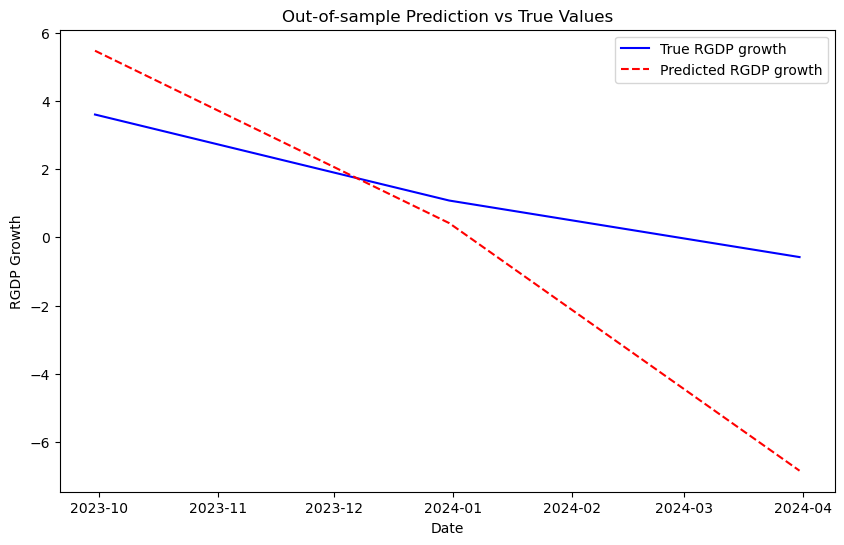

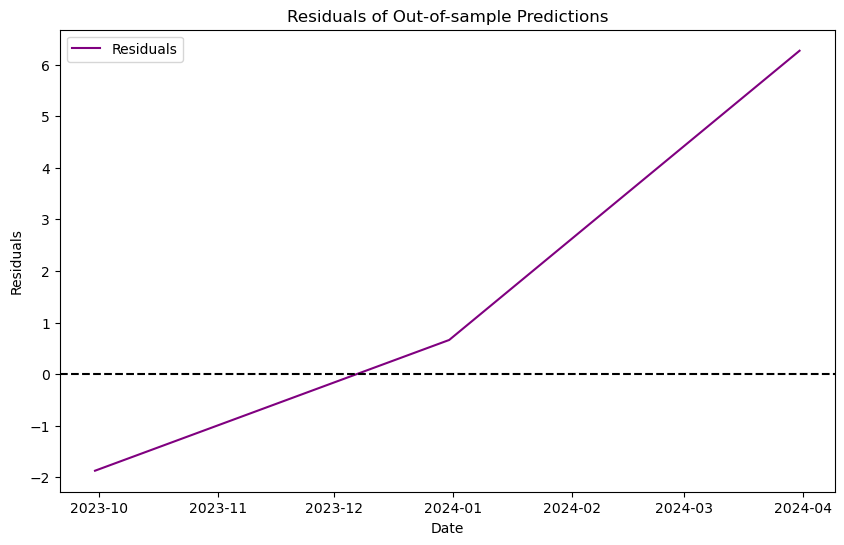

Mean Squared Error: 14.414478686547291


In [119]:
# Visualisation des résultats out-of-sample
plt.figure(figsize=(10,6))
plt.plot(y_test, label='True RGDP growth', color='blue')
plt.plot(outsample_pred_bridge_df['Predicted RGDP growth'], label='Predicted RGDP growth', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RGDP Growth')
plt.title('Out-of-sample Prediction vs True Values')
plt.legend()
plt.show()

# Analyse de la performance (out-of-sample)
def analyze_performance(true_values, predicted_values):
    # Calcul des résidus
    residuals = true_values - predicted_values
    
    # Visualisation des résidus
    plt.figure(figsize=(10,6))
    plt.plot(residuals, label='Residuals', color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.title('Residuals of Out-of-sample Predictions')
    plt.legend()
    plt.show()
    
    # Calcul du MSE
    mse = mean_squared_error(true_values, predicted_values)
    print(f"Mean Squared Error: {mse}")

# Appel de la fonction pour visualiser et analyser la performance
analyze_performance(y_test, outsample_pred_bridge_df['Predicted RGDP growth'])


In [136]:
ofsperformance(y_test, outsample_pred_bridge_df['Predicted RGDP growth'])

mean absolute error: 2.934492257143686
mean absolute percentage error: 3.9861222564522723
root mean square error: 3.796640447362285
real time root-mean-squared-forecast-error: [1.872391177300596, 1.404339634763346]
mean directional accuracy: 1.0
corr direction des previsions: -0.9999999999999999
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



In [15]:

combined_df = pd.read_pickle("combined_df.pkl")
pib_Q = pd.read_pickle("pib_Q.pkl")


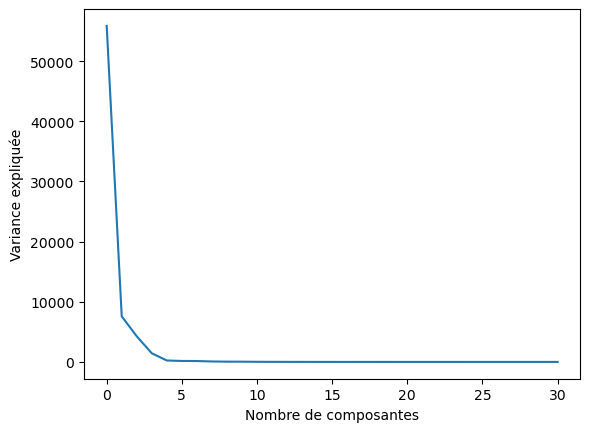

Nombre de facteurs communs: 2


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                            OLS Regression Results                            
Dep. Variable:             PIB chainé   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.9274
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.438
Time:                        14:54:30   Log-Likelihood:                -94.920
No. Observations:                  38   AIC:                             197.8
Df Residuals:                      34   BIC:                             204.4
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2957      0.470      2.755      0.0

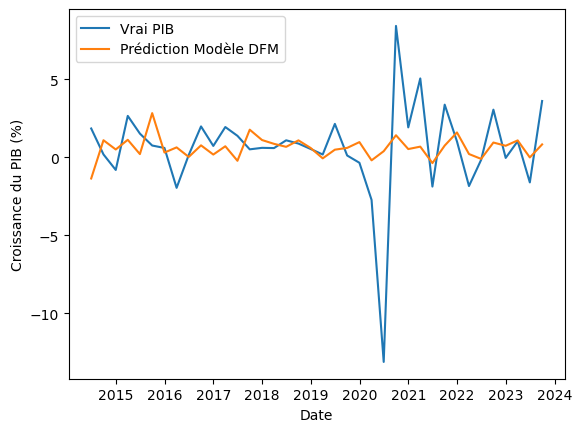

Erreur quadratique moyenne in-sample: 8.653075979144106


In [71]:
# Dynamic factor model

from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Définir l'ensemble d'entraînement
y_train = pib_Q.loc[:"2023-09-30"]

# Assurer que les données mensuelles et trimestrielles ont les bonnes fréquences
X_train_M = X_Mo_filled.loc["2014-06-30":"2023-09-30"]
X_train_Q = cho_emp_detrended.loc["2014-06-30":"2023-09-30"]

# Désagréger les données trimestrielles en fréquence mensuelle et remplir les mois manquants
X_train_QM = X_train_Q.resample("M").ffill()  # Remplir par la valeur du dernier mois du trimestre

# Concatenation des variables mensuelles et trimestrielles
indicators = pd.concat([X_train_M, X_train_QM], axis=1)

# Mettre l'indice à la fin de chaque mois pour les indicateurs
indicators.index = indicators.index.to_period("M").to_timestamp(how="end")

# Étape 1 : Analyse en composantes principales pour identifier le nombre de facteurs communs
pca = PCA()
pca.fit(indicators)
eigenvalues = pca.explained_variance_

# Tracer la variance expliquée par les composantes principales
plt.plot(eigenvalues)
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée")
plt.show()

# Sélectionner le nombre de facteurs expliquant 80% de la variance
num_factors = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.8) + 1
print("Nombre de facteurs communs:", num_factors)

# Définir un nombre de facteurs
n_factors = 3 

# Modèle Dynamic Factor
mod = DynamicFactor(indicators, k_factors=n_factors, factor_order=1, error_order=0)

# Ajustement du modèle
initial_res = mod.fit(method='powell', disp=False)
factor_est = mod.smooth(initial_res.params)

# Estimation des facteurs extraits
train_factors = factor_est.factors.smoothed

# Conversion des facteurs en fréquence trimestrielle
Q_train = pd.DataFrame({
    "Factor1": train_factors[0], 
    "Factor2": train_factors[1], 
    "Factor3": train_factors[2]
}, index=indicators.index).resample("Q").mean()
Q_train=Q_train.loc[:"2023-09-30"]

# Ajouter une constante aux facteurs trimestriels
Q_train = sm.add_constant(Q_train)

# Modélisation avec OLS pour estimer l'impact des facteurs sur la croissance du PIB
DFMmodel = sm.OLS(y_train, Q_train)
results_DFM = DFMmodel.fit(cov_type='HAC', cov_kwds={'maxlags': 4})
print(results_DFM.summary())

# In-sample performance (performance sur l'ensemble d'entraînement)
insample_predicted_DFM = results_DFM.predict(Q_train)
insample_DFM = pd.DataFrame(insample_predicted_DFM, index=y_train.index)

# Visualisation de la performance in-sample
plt.plot(y_train, label='Vrai PIB')
plt.plot(insample_DFM, label='Prédiction Modèle DFM')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.legend()
plt.show()

# Calcul du MSE pour l'ensemble d'entraînement
is_MSEdfm = mean_squared_error(y_train, insample_predicted_DFM)
print("Erreur quadratique moyenne in-sample:", is_MSEdfm)




In [139]:
r2_DFM = ofsperformance(y_train, insample_predicted_DFM)



mean absolute error: 1.771915802258941
mean absolute percentage error: 1.6189770672073298
root mean square error: 2.941611119632251
real time root-mean-squared-forecast-error: [3.204663867405962, 2.3552942253401197, 2.066986832178501, 1.9470342296112424, 1.8378429300309618, 1.8797632817149406, 1.7439103951413824, 1.8712478636744145, 1.7647260036733905, 1.7176260782450152, 1.6461645919942123, 1.615751211930831, 1.6145162377797144, 1.5917987818298076, 1.5432549319402877, 1.495792889545977, 1.4546751168635728, 1.4145132713421442, 1.3768654024082807, 1.3431279066352935, 1.359471969653067, 1.332249151528095, 1.3319461773279377, 1.402891264032471, 3.0307773165645506, 3.274220055730546, 3.224091725222142, 3.2720502923071164, 3.2272468188255647, 3.2089602240872543, 3.158469137844956, 3.129825714946617, 3.0820572415301317, 3.0578076965549896, 3.016681897981468, 2.9745002325840435, 2.945805421313947]
mean directional accuracy: 0.6486486486486487
corr direction des previsions: 0.26990944055395294

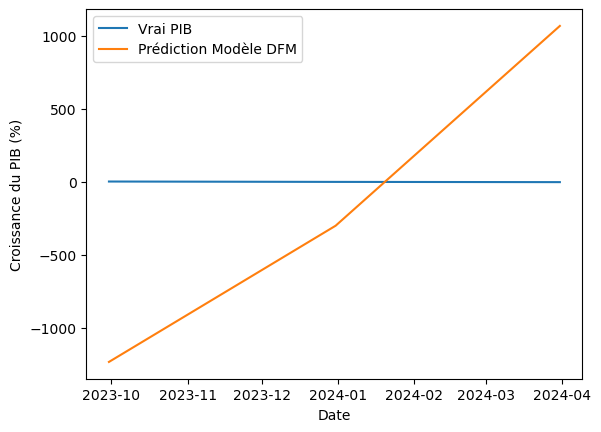

mean absolute error: 868.2588248099979
mean absolute percentage error: 822.5049479233376
root mean square error: 959.1137466870169
real time root-mean-squared-forecast-error: [1235.1858575115914, 898.8014951772105]
mean directional accuracy: 0.0
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



In [73]:
# Définir l'ensemble de test (Out-of-Sample)
y_test = pib_Q.loc["2023-09-30":"2024-03-31"]

# Assurer que les données mensuelles et trimestrielles ont les bonnes fréquences pour les données de test
X_test_M = X_Mo_filled.loc["2023-09-30":"2024-03-31"]
X_test_Q = cho_emp_detrended.loc["2023-09-30":"2024-03-31"]

# Désagréger les données trimestrielles en fréquence mensuelle et remplir les mois manquants
X_test_QM = X_test_Q.resample("M").ffill()  # Remplir par la valeur du dernier mois du trimestre

# Concatenation des variables mensuelles et trimestrielles pour les données de test
indicators_test = pd.concat([X_test_M, X_test_QM], axis=1)

# Mettre l'indice à la fin de chaque mois pour les indicateurs de test
indicators_test.index = indicators_test.index.to_period("M").to_timestamp(how="end")

# Appliquer l'ACP pour réduire les dimensions des données de test
test_factors = pca.transform(indicators_test)

# Créer un DataFrame des facteurs extraits pour les données de test
Q_test = pd.DataFrame({
    "Factor1": test_factors[:, 0], 
    "Factor2": test_factors[:, 1], 
    "Factor3": test_factors[:, 2]
}, index=indicators_test.index).resample("Q").mean()
Q_test=Q_test.loc[:"2024-03-31"]

# Ajouter une constante aux facteurs trimestriels pour les données de test
Q_test = sm.add_constant(Q_test)

# Prédiction hors-échantillon avec le modèle OLS
outsample_predicted_DFM = results_DFM.predict(Q_test)

# Visualiser la performance hors-échantillon
plt.plot(y_test, label='Vrai PIB')
plt.plot(outsample_predicted_DFM, label='Prédiction Modèle DFM')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.legend()
plt.show()

# Calcul du MSE pour l'ensemble de test
os_MSEdfm = ofsperformance(y_test, outsample_predicted_DFM)

    

In [140]:
ofsperformance(y_test, outsample_predicted_DFM)

mean absolute error: 868.2588248099979
mean absolute percentage error: 822.5049479233376
root mean square error: 959.1137466870169
real time root-mean-squared-forecast-error: [1235.1858575115914, 898.8014951772105]
mean directional accuracy: 0.0
corr direction des previsions: 1.0
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



Fitting 5 folds for each of 2 candidates, totalling 10 fits
Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE (in-sample) : 1.4484785334206314
MSE (out-of-sample) : 1.20259342555602


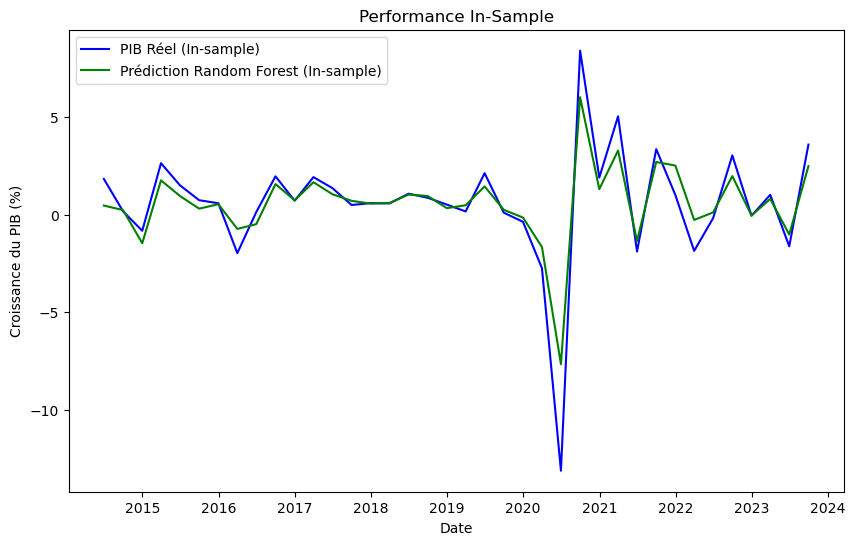

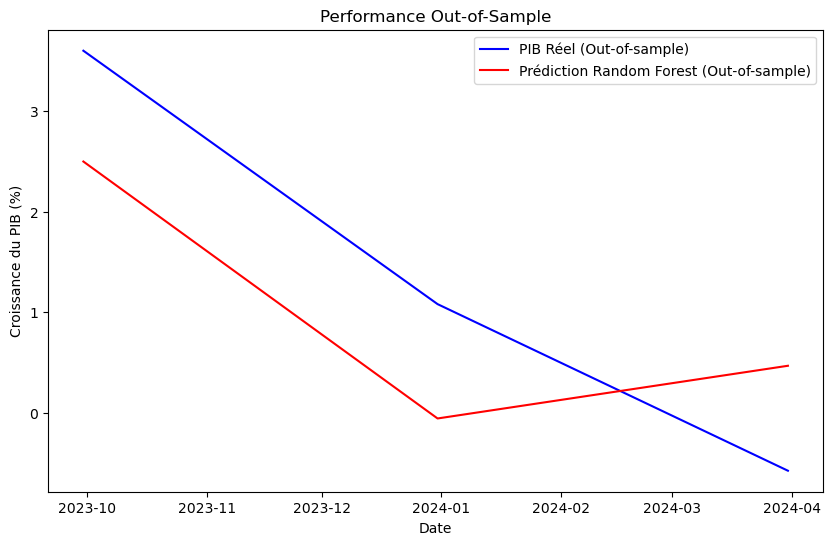

In [100]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Séparer les données in-sample (jusqu'au 31 octobre 2023) et out-of-sample (après cette date)
train_X = combined_df.loc[:"2023-09-30"].to_numpy()  # Variables explicatives jusqu'à 2023-10-31
train_y = pib_Q.loc[:"2023-09-30"].to_numpy().squeeze()  # PIB jusqu'à 2023-10-31

test_X = combined_df.loc["2023-09-30":].to_numpy()  # Variables explicatives après 2023-10-31
test_y = pib_Q.loc["2023-09-30":].to_numpy().squeeze()  # PIB après 2023-10-31

# Définir les hyperparamètres à tester pour le Random Forest
param_grid = {
    'n_estimators': [100],  # Nombre d'arbres
    'max_depth': [20],        # Profondeur maximale des arbres
    'min_samples_split': [2],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2],    # Nombre minimum d'échantillons dans une feuille
    'bootstrap': [True]        # Utiliser ou non le bootstrap
}

# Initialiser le modèle Random Forest
regr = RandomForestRegressor(random_state=0)

# Initialiser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraîner le modèle sur la période in-sample avec GridSearchCV
grid_search.fit(train_X, train_y)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle trouvé
best_regr = grid_search.best_estimator_

# Prédictions in-sample
insample_RF = best_regr.predict(train_X)

# Calcul du MSE in-sample
mse_train = mean_squared_error(train_y, insample_RF)
print(f"MSE (in-sample) : {mse_train}")

# Prédictions out-of-sample
outsample_RF = best_regr.predict(test_X)

# Calcul du MSE out-of-sample
mse_test = mean_squared_error(test_y, outsample_RF)
print(f"MSE (out-of-sample) : {mse_test}")

# Visualisation de la performance in-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc[:"2023-09-30"].index, train_y, label='PIB Réel (In-sample)', color='blue')
plt.plot(pib_Q.loc[:"2023-09-30"].index, insample_RF, label='Prédiction Random Forest (In-sample)', color='green')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance In-Sample')
plt.legend()
plt.show()

# Visualisation de la performance out-of-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc["2023-09-30":].index, test_y, label='PIB Réel (Out-of-sample)', color='blue')
plt.plot(pib_Q.loc["2023-09-30":].index, outsample_RF, label='Prédiction Random Forest (Out-of-sample)', color='red')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance Out-of-Sample')
plt.legend()
plt.show()



In [141]:
ofsperformance(train_y, insample_RF)

mean absolute error: 0.7273313629731598
mean absolute percentage error: 0.568482910131686
root mean square error: 1.2035275374583796
real time root-mean-squared-forecast-error: [1.365827308203885, 0.9668281742337729, 0.8718057997083747, 0.873890206069358, 0.8191767913607247, 0.7684600161578246, 0.7116810754497749, 0.7972788547519565, 0.7795626522711927, 0.7501645637995084, 0.7152845617588478, 0.6889863136621039, 0.6676881392915651, 0.6459171189381137, 0.6240464934390899, 0.6042584135065424, 0.5863186119200786, 0.5702005230314594, 0.5565894992429167, 0.5471637130565181, 0.5540519115073551, 0.5422043918897174, 0.5322433055817315, 0.5661086411536524, 1.2257565163519448, 1.2897086563999995, 1.270730100685601, 1.2910599641988365, 1.2725581386232583, 1.2569252900009, 1.265973063764316, 1.2772242954050783, 1.2587507107177847, 1.2533917335066138, 1.235357919819941, 1.2185890335043923, 1.2061123729632415]
mean directional accuracy: 0.8918918918918919
corr direction des previsions: 0.98522586997

In [142]:
ofsperformance(test_y, outsample_RF)

mean absolute error: 1.0959508206330315
mean absolute percentage error: 1.0552463265964693
root mean square error: 1.0966282075325346
real time root-mean-squared-forecast-error: [1.1036408791034344, 1.1213752832420654]
mean directional accuracy: 0.5
corr direction des previsions: 1.0
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
MSE (in-sample) : 3.5911115593684855
MSE (out-of-sample) : 1.9214537337451774


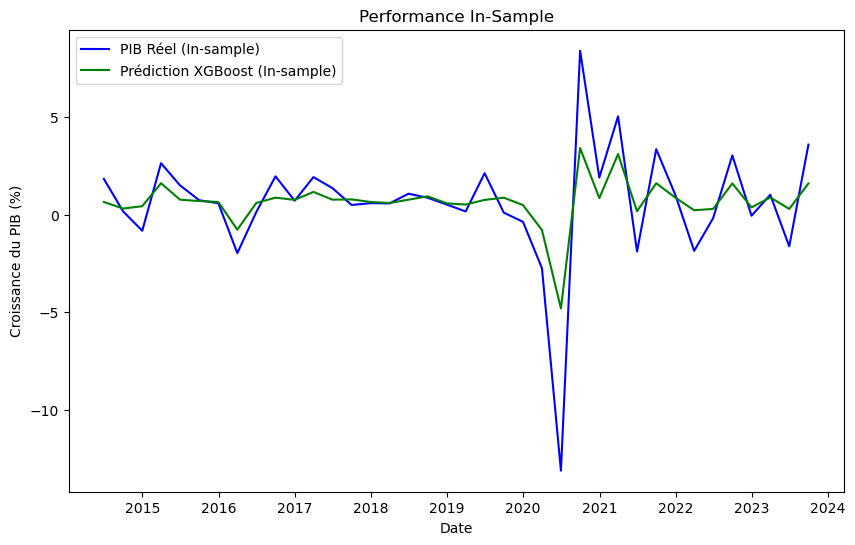

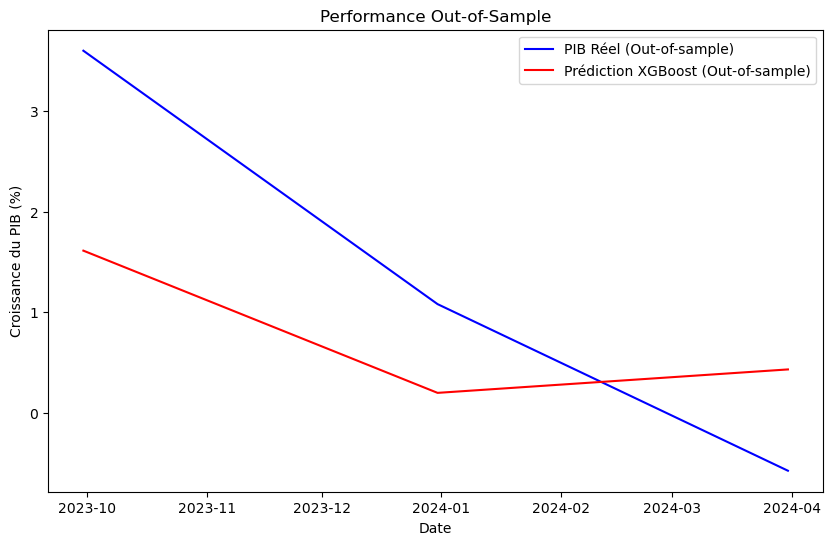

In [97]:
#XGBOOST
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Séparer les données in-sample (jusqu'au 31 octobre 2023) et out-of-sample (après cette date)
train_X = combined_df.loc[:"2023-09-30"].to_numpy()  # Variables explicatives jusqu'à 2023-10-31
train_y = pib_Q.loc[:"2023-09-30"].to_numpy().squeeze()  # PIB jusqu'à 2023-10-31

test_X = combined_df.loc["2023-09-30":].to_numpy()  # Variables explicatives après 2023-10-31
test_y = pib_Q.loc["2023-09-30":].to_numpy().squeeze()  # PIB après 2023-10-31

# Définir les hyperparamètres à tester pour XGBoost
param_grid = {
    'n_estimators': [100],      # Nombre d'arbres
    'max_depth': [3, 5, 7],               # Profondeur maximale des arbres
    'learning_rate': [0.01],    # Taux d'apprentissage
    'subsample': [0.8, 1.0],              # Sous-échantillonnage des données d'entraînement
    'colsample_bytree': [0.8, 1.0],       # Sous-échantillonnage des colonnes par arbre
    'gamma': [0.2],               # Critère de régularisation
}

# Initialiser le modèle XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Initialiser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraîner le modèle sur la période in-sample avec GridSearchCV
grid_search.fit(train_X, train_y)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle trouvé
best_xgb = grid_search.best_estimator_

# Prédictions in-sample
insample_XGB = best_xgb.predict(train_X)

# Calcul du MSE in-sample
mse_train = mean_squared_error(train_y, insample_XGB)
print(f"MSE (in-sample) : {mse_train}")

# Prédictions out-of-sample
outsample_XGB = best_xgb.predict(test_X)

# Calcul du MSE out-of-sample
mse_test = mean_squared_error(test_y, outsample_XGB)
print(f"MSE (out-of-sample) : {mse_test}")

# Visualisation de la performance in-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc[:"2023-10-31"].index, train_y, label='PIB Réel (In-sample)', color='blue')
plt.plot(pib_Q.loc[:"2023-10-31"].index, insample_XGB, label='Prédiction XGBoost (In-sample)', color='green')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance In-Sample')
plt.legend()
plt.show()

# Visualisation de la performance out-of-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc["2023-09-30":].index, test_y, label='PIB Réel (Out-of-sample)', color='blue')
plt.plot(pib_Q.loc["2023-09-30":].index, outsample_XGB, label='Prédiction XGBoost (Out-of-sample)', color='red')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance Out-of-Sample')
plt.legend()
plt.show()


In [143]:
ofsperformance(train_y, insample_XGB)

mean absolute error: 1.142864467975103
mean absolute percentage error: 1.1341908902729276
root mean square error: 1.8950228387458778
real time root-mean-squared-forecast-error: [1.1823249295043468, 0.8421613343656464, 1.0001870285568502, 1.0068334414600764, 0.9586979206100443, 0.8753355764858155, 0.8107710840413809, 0.86949357273579, 0.8343201902523502, 0.8636133094893316, 0.8235267135454822, 0.8183636616812949, 0.8032897812601444, 0.7778542024072593, 0.7516289724841669, 0.7277807634780368, 0.7099482862084854, 0.6901674948851224, 0.671920214474025, 0.6596793860197602, 0.7096591411584878, 0.7124343901674968, 0.7193615389029707, 0.8095939784129776, 1.8428288445384893, 2.0550235028274724, 2.0267584097214444, 2.023566366487967, 2.025003804036744, 2.0163575928393844, 1.9837107491636026, 1.986901570137298, 1.9582848644334307, 1.944934963271735, 1.9183166207325553, 1.8916209742874899, 1.8923528535589802]
mean directional accuracy: 0.8648648648648649
corr direction des previsions: 0.9764543501

In [144]:
ofsperformance(test_y, outsample_XGB)

mean absolute error: 1.2946874380154962
mean absolute percentage error: 1.0376666668351329
root mean square error: 1.3861651177782455
real time root-mean-squared-forecast-error: [1.991297147140095, 1.5405326596878268]
mean directional accuracy: 0.5
corr direction des previsions: 0.9999999999999998
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e-02, tolerance: 2.210e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.488e-01, tolerance: 2.830e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\U

Meilleur alpha: 3.562247890262444, Meilleur l1_ratio: 1.0
Erreur quadratique moyenne in-sample : 6.738693217853136


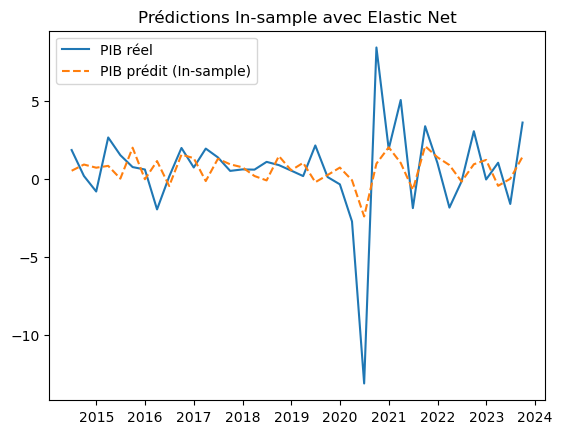

In [104]:
#Bayesian methods : ELASTICITY NET

import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Définir les périodes d'entraînement (PIB et les variables explicatives)
y_train = pib_Q.loc[:"2023-09-30"].squeeze()  # PIB en tant que série
X_train = combined_df.loc["2014-06-30":"2023-09-30"]  # Variables explicatives trimestrielles

# Définir un split temporel pour la validation croisée
tscv = TimeSeriesSplit(n_splits=7)

# Définition du modèle Elastic Net
elastic_net = ElasticNet()

# Grille de recherche d'hyperparamètres pour alpha et l1_ratio
param_grid = {
    'alpha': np.logspace(-6, 4, 30),   # Augmenter la plage de 1e-6 à 1e4 avec 50 valeurs
    'l1_ratio': np.linspace(0, 1, 30)  # Augmenter la granularité à 50 valeurs entre 0 et 1
}

# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(elastic_net, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"Meilleur alpha: {best_alpha}, Meilleur l1_ratio: {best_l1_ratio}")

# Ajuster le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
y_pred_in_sample = best_model.predict(X_train)
# Calcul de l'erreur in-sample
mse_in_sample = mean_squared_error(y_train, y_pred_in_sample)
print(f"Erreur quadratique moyenne in-sample : {mse_in_sample}")

# Tracer les prédictions in-sample par rapport aux vraies valeurs
plt.plot(y_train.index, y_train, label='PIB réel')
plt.plot(y_train.index, y_pred_in_sample, label='PIB prédit (In-sample)', linestyle='--')
plt.legend()
plt.title("Prédictions In-sample avec Elastic Net")
plt.show()


In [145]:
ofsperformance(y_train, y_pred_in_sample)

mean absolute error: 1.6310279357670594
mean absolute percentage error: 1.8820228697157562
root mean square error: 2.595899308111379
real time root-mean-squared-forecast-error: [1.326952633321744, 1.072021268687739, 1.2420820922426408, 1.409226361191705, 1.4284433716836238, 1.3991722255947578, 1.3166689014500077, 1.648046924476022, 1.5670086865038093, 1.4926181244112338, 1.4344524925771895, 1.4990362851675432, 1.4404458650462866, 1.3926059144626866, 1.345831586032802, 1.307092513199572, 1.3004542120420166, 1.2711758115775336, 1.2372785176160481, 1.22079474395413, 1.297532344334634, 1.267997586446278, 1.260214664859538, 1.3465170677633325, 2.5147533573979017, 2.8659349557097413, 2.8124389555447493, 2.8651556606936803, 2.823703832883015, 2.7860024576977356, 2.7414852088418895, 2.741034215956176, 2.699184744443437, 2.683876896553945, 2.6537310260764637, 2.62821377206208, 2.6060222663418053]
mean directional accuracy: 0.4864864864864865
corr direction des previsions: 0.49538978195909017
wh

Erreur quadratique moyenne out-sample : 1.8823703515055854


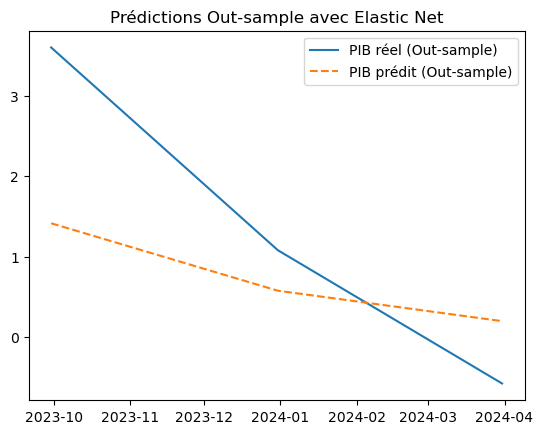

In [107]:
# Définir les périodes pour l'entraînement et la validation out-sample
y_test = pib_Q.loc["2023-09-30":]  # PIB pour la période out-sample
X_test = combined_df.loc["2023-09-30":]  # Variables explicatives pour la validation

# Ajuster le modèle sur les données d'entraînement complètes
best_model.fit(X_train, y_train)

# Prédictions out-sample
y_pred_out_sample = best_model.predict(X_test)

# Calcul de l'erreur out-sample
mse_out_sample = mean_squared_error(y_test, y_pred_out_sample)
print(f"Erreur quadratique moyenne out-sample : {mse_out_sample}")

# Tracer les prédictions out-sample par rapport aux vraies valeurs
plt.plot(y_test.index, y_test, label='PIB réel (Out-sample)')
plt.plot(y_test.index, y_pred_out_sample, label='PIB prédit (Out-sample)', linestyle='--')
plt.legend()
plt.title("Prédictions Out-sample avec Elastic Net")
plt.show()


In [146]:
ofsperformance(y_test, y_pred_out_sample)

mean absolute error: 1.156400744290526
mean absolute percentage error: 0.8048368411414565
root mean square error: 1.3719950260498708
real time root-mean-squared-forecast-error: [2.1886791289852843, 1.588193989634066]
mean directional accuracy: 1.0
corr direction des previsions: 0.9999999999999998
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide



In [88]:
import plotly.graph_objects as go


# Dates correspondant à y_train
dates_train = y_train.index

# Résidus in-sample pour les cinq modèles
residuals_bridge_in = y_train - insample_pred_bridge
residuals_DFM_in = y_train - insample_predicted_DFM
residuals_RF_in = train_y - insample_RF
residuals_boosting_in = train_y - insample_XGB
residuals_bayesian_in = y_train - y_pred_in_sample

# Tracer les résidus in-sample
fig_in_residuals = go.Figure()

fig_in_residuals.add_trace(go.Scatter(x=dates_train, y=residuals_bridge_in, mode='lines', name='Bridge'))
fig_in_residuals.add_trace(go.Scatter(x=dates_train, y=residuals_DFM_in, mode='lines', name='Dynamic Factors'))
fig_in_residuals.add_trace(go.Scatter(x=dates_train, y=residuals_RF_in, mode='lines', name='Random Forest'))
fig_in_residuals.add_trace(go.Scatter(x=dates_train, y=residuals_boosting_in, mode='lines', name='Boosting'))
fig_in_residuals.add_trace(go.Scatter(x=dates_train, y=residuals_bayesian_in, mode='lines', name='Bayesian'))

fig_in_residuals.update_layout(title='Évolution des résidus in-sample des cinq modèles', 
                               xaxis_title='Date', yaxis_title='Résidus')
fig_in_residuals.write_image('residuals_insample_5models.png')
fig_in_residuals.show()



In [121]:

# Dates correspondant à y_test (ou une autre série pour l'out-sample)
dates_test = y_test.index

# Résidus out-sample pour les cinq modèles
residuals_bridge_out = y_test - outsample_pred_bridge
residuals_DFM_out = y_test - outsample_predicted_DFM
residuals_RF_out = y_test - outsample_RF
residuals_boosting_out = y_test - outsample_XGB
residuals_bayesian_out = y_test - y_pred_out_sample

# Tracer les résidus out-sample
fig_out_residuals = go.Figure()

fig_out_residuals.add_trace(go.Scatter(x=dates_test, y=residuals_bridge_out, mode='lines', name='Bridge'))
#fig_out_residuals.add_trace(go.Scatter(x=dates_test, y=residuals_DFM_out, mode='lines', name='Dynamic Factors'))
fig_out_residuals.add_trace(go.Scatter(x=dates_test, y=residuals_RF_out, mode='lines', name='Random Forest'))
fig_out_residuals.add_trace(go.Scatter(x=dates_test, y=residuals_boosting_out, mode='lines', name='Boosting'))
fig_out_residuals.add_trace(go.Scatter(x=dates_test, y=residuals_bayesian_out, mode='lines', name='Bayesian'))

fig_out_residuals.update_layout(title='Évolution des résidus out-sample des cinq modèles', 
                                xaxis_title='Date', yaxis_title='Résidus')
fig_out_residuals.write_image('residuals_outsample_5models.png')
fig_out_residuals.show()



In [122]:
# Real-Time RMSE pour chaque modèle (insample)
rmse_rf_insample = [1.365827308203885, 0.9668281742337729, 0.8718057997083747, 0.873890206069358, 0.8191767913607247, 0.7684600161578246, 0.7116810754497749, 0.7972788547519565, 0.7795626522711927, 0.7501645637995084, 0.7152845617588478, 0.6889863136621039, 0.6676881392915651, 0.6459171189381137, 0.6240464934390899, 0.6042584135065424, 0.5863186119200786, 0.5702005230314594, 0.5565894992429167, 0.5471637130565181, 0.5540519115073551, 0.5422043918897174, 0.5322433055817315, 0.5661086411536524, 1.2257565163519448, 1.2897086563999995, 1.270730100685601, 1.2910599641988365, 1.2725581386232583, 1.2569252900009, 1.265973063764316, 1.2772242954050783, 1.2587507107177847, 1.2533917335066138, 1.235357919819941, 1.2185890335043923, 1.2061123729632415]
rmse_dfm_insample = [3.204663867405962, 2.3552942253401197, 2.066986832178501, 1.9470342296112424, 1.8378429300309618, 1.8797632817149406, 1.7439103951413824, 1.8712478636744145, 1.7647260036733905, 1.7176260782450152, 1.6461645919942123, 1.615751211930831, 1.6145162377797144, 1.5917987818298076, 1.5432549319402877, 1.495792889545977, 1.4546751168635728, 1.4145132713421442, 1.3768654024082807, 1.3431279066352935, 1.359471969653067, 1.332249151528095, 1.3319461773279377, 1.402891264032471, 3.0307773165645506, 3.274220055730546, 3.224091725222142, 3.2720502923071164, 3.2272468188255647, 3.2089602240872543, 3.158469137844956, 3.129825714946617, 3.0820572415301317, 3.0578076965549896, 3.016681897981468, 2.9745002325840435, 2.945805421313947]

rmse_bridge_insample = [2.3281596286966773, 2.047921694728628, 1.8778983408423078, 1.645366258949291, 1.5492216728069248, 1.422026984047021, 1.328960113499687, 1.2609280942387542, 1.212316432019103, 1.1613399925925392, 1.128387067584272, 1.216947394882215, 1.2360305583349314, 1.1912028237161503, 1.151449225577121, 1.120576683384157, 1.0915205171775544, 1.0615799357864317, 1.0387237429353002, 1.033559540775604, 1.0259246785831533, 1.002580539260389, 1.0364002610285952, 1.048934600031933, 1.2560974393854607, 1.5564914148657782, 1.5387493474204241, 1.650682017654175, 1.6415955185434619, 1.6331937847927194, 1.6835863175273735, 1.7159722697010988, 1.7075575805281267, 1.682391543321997, 1.6603449377780093, 1.6517144192951383, 1.6363128431758833]
rmse_bayesian_insample= [1.326952633321744, 1.072021268687739, 1.2420820922426408, 1.409226361191705, 1.4284433716836238, 1.3991722255947578, 1.3166689014500077, 1.648046924476022, 1.5670086865038093, 1.4926181244112338, 1.4344524925771895, 1.4990362851675432, 1.4404458650462866, 1.3926059144626866, 1.345831586032802, 1.307092513199572, 1.3004542120420166, 1.2711758115775336, 1.2372785176160481, 1.22079474395413, 1.297532344334634, 1.267997586446278, 1.260214664859538, 1.3465170677633325, 2.5147533573979017, 2.8659349557097413, 2.8124389555447493, 2.8651556606936803, 2.823703832883015, 2.7860024576977356, 2.7414852088418895, 2.741034215956176, 2.699184744443437, 2.683876896553945, 2.6537310260764637, 2.62821377206208, 2.6060222663418053]
rmse_xg_insample=[1.1823249295043468, 0.8421613343656464, 1.0001870285568502, 1.0068334414600764, 0.9586979206100443, 0.8753355764858155, 0.8107710840413809, 0.86949357273579, 0.8343201902523502, 0.8636133094893316, 0.8235267135454822, 0.8183636616812949, 0.8032897812601444, 0.7778542024072593, 0.7516289724841669, 0.7277807634780368, 0.7099482862084854, 0.6901674948851224, 0.671920214474025, 0.6596793860197602, 0.7096591411584878, 0.7124343901674968, 0.7193615389029707, 0.8095939784129776, 1.8428288445384893, 2.0550235028274724, 2.0267584097214444, 2.023566366487967, 2.025003804036744, 2.0163575928393844, 1.9837107491636026, 1.986901570137298, 1.9582848644334307, 1.944934963271735, 1.9183166207325553, 1.8916209742874899, 1.8923528535589802]
# Création du graphique
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates_test, y=rmse_rf_insample, mode='lines', name='Random Forest'))
fig.add_trace(go.Scatter(x=dates_test,y=rmse_dfm_insample, mode='lines', name='Dynamic Factor Model'))
fig.add_trace(go.Scatter(x=dates_test,y=rmse_bridge_insample, mode='lines', name='Bridge Model'))
fig.add_trace(go.Scatter(x=dates_test,y=rmse_xg_insample, mode='lines', name='XGBoost'))
fig.add_trace(go.Scatter(x=dates_test,y=rmse_bayesian_insample, mode='lines', name='Elasticity net'))
fig.update_layout(title="Évolution du Real-Time RMSE (Insample)",
                  xaxis_title="temps",
                  yaxis_title="RMSE",
                  legend_title="Modèles")
fig.write_image("rmse_insample.png")

fig.show()


In [123]:
# Real-Time RMSE pour chaque modèle (outsample)
rmse_rf_outsample = [1.1036408791034344, 1.1213752832420654]

rmse_dfm_outsample = [1235.1858575115914, 898.8014951772105]

rmse_bridge_outsample = [1.872391177300596, 1.404339634763346]
rmse_xg_outsample = [1.991297147140095, 1.5405326596878268]

rmse_elasticity_outsample = [2.1886791289852843, 1.588193989634066]


# Création du graphique
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates_test, y=rmse_rf_outsample, mode='lines', name='Random Forest'))
#fig.add_trace(go.Scatter(x=dates_test, y=rmse_dfm_outsample, mode='lines', name='Dynamic Factor Model'))
fig.add_trace(go.Scatter(x=dates_test,y=rmse_bridge_outsample, mode='lines', name='Bridge Model'))
fig.add_trace(go.Scatter(x=dates_test, y=rmse_xg_outsample, mode='lines', name='XGBoost'))
fig.add_trace(go.Scatter(x=dates_test, y=rmse_elasticity_outsample, mode='lines', name='Elasticity net'))
fig.update_layout(title="Évolution du Real-Time RMSE (Outsample)",
                  xaxis_title="temps",
                  yaxis_title="RMSE",
                  legend_title="Modèles")
fig.write_image("rmse_outsampleRF_BM.png")

fig.show()


In [128]:
# Création du graphique
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_train.index, y=train_y, mode='lines', name='Vrai PIB'))
fig.add_trace(go.Scatter(x=y_train.index, y=insample_RF, mode='lines', name='Random Forest'))
fig.add_trace(go.Scatter(x=y_train.index, y=insample_predicted_DFM, mode='lines', name='Dynamic Factor Model'))
fig.add_trace(go.Scatter(x=y_train.index, y=insample_pred_bridge, mode='lines', name='Bridge Model'))
fig.add_trace(go.Scatter(x=y_train.index, y=insample_XGB, mode='lines', name='XGBoost'))
fig.add_trace(go.Scatter(x=y_train.index, y=y_pred_in_sample, mode='lines', name='Elasticity net'))
fig.update_layout(title="Prévisions du PIB (Insample)",
                  xaxis_title="Date",
                  yaxis_title="PIB (%)",
                  legend_title="Modèles")
fig.write_image("pib_forecast_insample.png")

fig.show()


In [130]:
# Création du graphique
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test.index, y=test_y, mode='lines', name='Vrai PIB'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_RF, mode='lines', name='Random Forest'))
#fig.add_trace(go.Scatter(x=y_test.index, y=outsample_predicted_DFM, mode='lines', name='Dynamic Factor Model'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_pred_bridge, mode='lines', name='Bridge Model'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_XGB, mode='lines', name='XGBoost'))
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_out_sample, mode='lines', name='Elasticity net'))
fig.update_layout(title="Prévisions du PIB (Outsample)",
                  xaxis_title="Date",
                  yaxis_title="PIB (%)",
                  legend_title="Modèles")
fig.write_image("pib_forecast_outsampleRF_BM.png")
fig.show()


In [131]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test.index, y=test_y, mode='lines', name='Vrai PIB'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_RF, mode='lines', name='Random Forest'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_predicted_DFM, mode='lines', name='Dynamic Factor Model'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_pred_bridge, mode='lines', name='Bridge Model'))
fig.add_trace(go.Scatter(x=y_test.index, y=outsample_XGB, mode='lines', name='XGBoost'))
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_out_sample, mode='lines', name='Elasticity net'))
fig.update_layout(title="Prévisions du PIB (Outsample)",
                  xaxis_title="Date",
                  yaxis_title="PIB (%)",
                  legend_title="Modèles")
fig.write_image("pib_forecast_outsample.png")
fig.show()

In [147]:
# MDA pour chaque modèle (insample et outsample)
mda_rf_insample = 0.8918918918
mda_rf_outsample = 0.5
mda_dfm_insample = 0.648
mda_dfm_outsample = 0
mda_bridge_insample = 0.8378378378378378
mda_bridge_outsample = 1.0
mda_elast_insample = 0.4864
mda_elast_outsample = 1.0
mda_xg_insample = 0.864
mda_xg_outsample = 0.5

labels = ['Random Forest', 'Dynamic Factor Model', 'Bridge Model','Elasticity Net', 'XGBoost']
insample_values = [mda_rf_insample, mda_dfm_insample, mda_bridge_insample, mda_elast_insample,mda_xg_insample]
outsample_values = [mda_rf_outsample, mda_dfm_outsample, mda_bridge_outsample, mda_elast_outsample, mda_xg_outsample]

# Création du diagramme
fig = go.Figure(data=[
    go.Bar(name='Insample', x=labels, y=insample_values),
    go.Bar(name='Outsample', x=labels, y=outsample_values)
])

fig.update_layout(title="Mean Directional Accuracy (MDA)",
                  xaxis_title="Modèles",
                  yaxis_title="MDA",
                  barmode='group')
fig.write_image("mda_insample_outsample.png")

fig.show()


In [148]:

# MDA pour chaque modèle (insample et outsample)
mda_rf_insample = 0.985
mda_rf_outsample = 1
mda_dfm_insample = 0.27
mda_dfm_outsample = 1
mda_bridge_insample = 0.8912770996864096
mda_bridge_outsample = -0.99999999999
mda_elast_insample = 0.495
mda_elast_outsample = 0.9999
mda_xg_insample = 0.97645
mda_xg_outsample = 0.9999999

labels = ['Random Forest', 'Dynamic Factor Model', 'Bridge Model','Elasticity Net', 'XGBoost']
insample_values = [mda_rf_insample, mda_dfm_insample, mda_bridge_insample, mda_elast_insample,mda_xg_insample]
outsample_values = [mda_rf_outsample, mda_dfm_outsample, mda_bridge_outsample, mda_elast_outsample, mda_xg_outsample]

# Création du diagramme
fig = go.Figure(data=[
    go.Bar(name='Insample', x=labels, y=insample_values),
    go.Bar(name='Outsample', x=labels, y=outsample_values)
])

fig.update_layout(title="Corrélation des Variations",
                  xaxis_title="Modèles",
                  yaxis_title="Corr",
                  barmode='group')
fig.write_image("corr_insample_outsample.png")

fig.show()


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Meilleurs hyperparamètres (sans NDVI et Precipitation) : {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE (in-sample) : 2.94736445758696
MSE (out-of-sample) : 0.7179988417570771


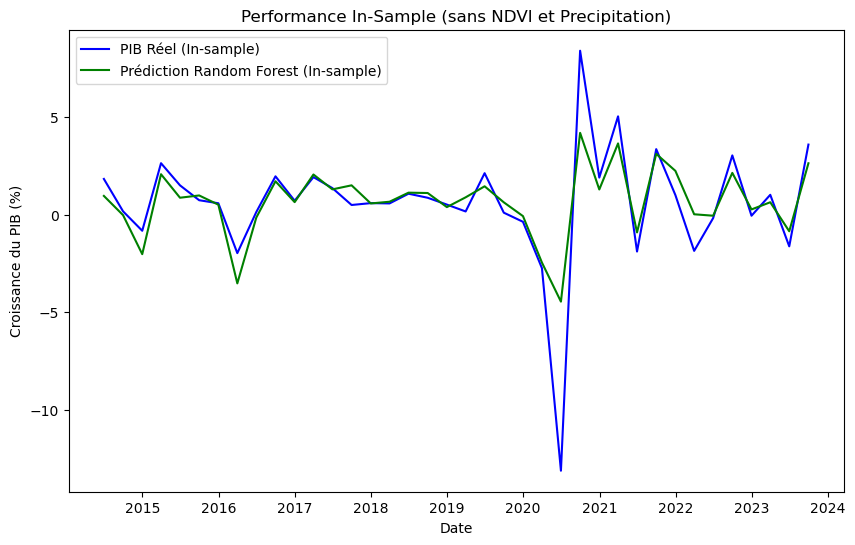

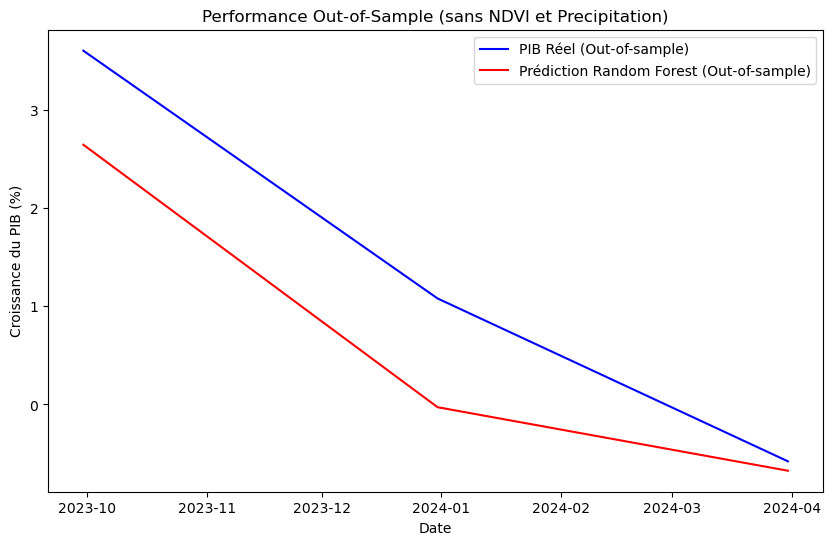

In [150]:
# RANDOM FOREST après Suppression des variables NDVI et Precipitation 
combined_df_new = combined_df.drop(columns=['NDVI', 'Precipitation'])

# Séparer les données in-sample (jusqu'au 30 septembre 2023) et out-of-sample (après cette date)
train_X_new = combined_df_new.loc[:"2023-09-30"].to_numpy()  # Variables explicatives jusqu'à 2023-09-30
train_y_new = pib_Q.loc[:"2023-09-30"].to_numpy().squeeze()  # PIB jusqu'à 2023-09-30

test_X_new = combined_df_new.loc["2023-09-30":].to_numpy()  # Variables explicatives après 2023-09-30
test_y_new = pib_Q.loc["2023-09-30":].to_numpy().squeeze()  # PIB après 2023-09-30

# Définir les hyperparamètres à tester pour le Random Forest
param_grid_new = {
    'n_estimators': [100],  # Nombre d'arbres
    'max_depth': [20],        # Profondeur maximale des arbres
    'min_samples_split': [2],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2],    # Nombre minimum d'échantillons dans une feuille
    'bootstrap': [True]        # Utiliser ou non le bootstrap
}

# Initialiser le modèle Random Forest
regr_new = RandomForestRegressor(random_state=0)

# Initialiser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search_new = GridSearchCV(estimator=regr_new, param_grid=param_grid_new, 
                                cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraîner le modèle sur la période in-sample avec GridSearchCV
grid_search_new.fit(train_X_new, train_y_new)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres (sans NDVI et Precipitation) : {grid_search_new.best_params_}")

# Utiliser le meilleur modèle trouvé
best_regr_new = grid_search_new.best_estimator_

# Prédictions in-sample
insample_RF_new = best_regr_new.predict(train_X_new)

# Calcul du MSE in-sample
mse_train_new = mean_squared_error(train_y_new, insample_RF_new)
print(f"MSE (in-sample) : {mse_train_new}")

# Prédictions out-of-sample
outsample_RF_new = best_regr_new.predict(test_X_new)

# Calcul du MSE out-of-sample
mse_test_new = mean_squared_error(test_y_new, outsample_RF_new)
print(f"MSE (out-of-sample) : {mse_test_new}")

# Visualisation de la performance in-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc[:"2023-09-30"].index, train_y_new, label='PIB Réel (In-sample)', color='blue')
plt.plot(pib_Q.loc[:"2023-09-30"].index, insample_RF_new, label='Prédiction Random Forest (In-sample)', color='green')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance In-Sample (sans NDVI et Precipitation)')
plt.legend()
plt.show()

# Visualisation de la performance out-of-sample
plt.figure(figsize=(10,6))
plt.plot(pib_Q.loc["2023-09-30":].index, test_y_new, label='PIB Réel (Out-of-sample)', color='blue')
plt.plot(pib_Q.loc["2023-09-30":].index, outsample_RF_new, label='Prédiction Random Forest (Out-of-sample)', color='red')
plt.xlabel('Date')
plt.ylabel('Croissance du PIB (%)')
plt.title('Performance Out-of-Sample (sans NDVI et Precipitation)')
plt.legend()
plt.show()


In [151]:
ofsperformance(train_y_new, insample_RF_new)

mean absolute error: 0.864836947396418
mean absolute percentage error: 0.8988252437624764
root mean square error: 1.7167889962330725
real time root-mean-squared-forecast-error: [0.8709068360643607, 0.6311298926896624, 0.8634661987255742, 0.7994141059459036, 0.7693750587103063, 0.7093863308322902, 0.6573583107809419, 0.8238966203247666, 0.7825604075229603, 0.7467253696129236, 0.7123113028267781, 0.6830848142055612, 0.6565343906453083, 0.6876468227947784, 0.6643436902964993, 0.6436121096002824, 0.6245281170335819, 0.6096383838364587, 0.5941114478100031, 0.6013124210441123, 0.6048921234165527, 0.6017147160040542, 0.5916110308390633, 0.5821021936231496, 1.8253465469178938, 1.9712678185625485, 1.9379717477648424, 1.9210590768381137, 1.8963979405639515, 1.8650507758668395, 1.8482380003864394, 1.8491306846595539, 1.82102448129295, 1.8006178283339185, 1.7755440983522177, 1.7518688718113902, 1.7326923653005264]
mean directional accuracy: 0.8378378378378378
corr direction des previsions: 0.88714

In [152]:
ofsperformance(test_y_new, outsample_RF_new)

mean absolute error: 0.7204498819800031
mean absolute percentage error: 0.4854796579783294
root mean square error: 0.8473481231212335
real time root-mean-squared-forecast-error: [0.9579167895946754, 1.0355803416458673]
mean directional accuracy: 1.0
corr direction des previsions: 1.0
whole mean directional accuracy: nan


C:\Users\User\AppData\Local\Temp\ipykernel_5796\3654491712.py:6: RuntimeWarning:

invalid value encountered in scalar divide

